## import necessary packages and read in files 

In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import numpy as np
import re

In [2]:
voting_turnout = pd.read_csv('../data/2018-turnout-population-congress-districts.csv', nrows = 436)
voting_age = pd.read_csv('../data/2018-age-population-congress-districts.csv', nrows = 436)
voting_ed = pd.read_csv('../data/2018-education-population-congress-districts.csv', nrows = 436)
voting_sex_poverty = pd.read_csv('../data/2018-sex-poverty-population-congress-districts.csv', nrows = 436)
voting_race = pd.read_csv('../data/2018-race-population-congress-districts.csv', nrows = 436)

## Remove excess columns. Create new column that combines State Abbreviation and Congressional District, named District (for easier merges later). Convert object columns to either int64 or float datatypes. 

## Voter Turnout data clean up. 

## Remove dud columns, create district column. Correct spacing issues inside column names and move new district column to first index. 

In [3]:
voting_turnout.head()

,Line #,State abbreviation,State name,Congressional district,"Votes cast for congressional representative for the November 6, 2018 election1",Citizen voting-age population Estimate,Citizen voting-age population Margin of error (MOE),Voting Rate Estimate,Voting Rate Margin of error (MOE),Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1,AL,Alabama,1,"242,617","544,464","3,424",44.6,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,AL,Alabama,2,"226,230","516,295","5,674",43.8,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,AL,Alabama,3,"231,915","543,854","4,099",42.6,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,AL,Alabama,4,"230,969","515,701","4,678",44.8,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,AL,Alabama,5,"260,673","551,968","2,121",47.2,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
voting_turnout = voting_turnout.drop(columns = ['Line #', ' Citizen voting-age population Margin of error (MOE) ', ' Voting Rate Margin of error (MOE) ', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 
                                              'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18'])

In [5]:
voting_turnout['District'] = voting_turnout['State abbreviation'] + "-" + voting_turnout['Congressional district']

In [6]:
voting_turnout.columns

Index(['State abbreviation', 'State name', 'Congressional district',
       'Votes cast for congressional representative for the November 6, 2018 election1',
       ' Citizen voting-age population Estimate ', ' Voting Rate Estimate ',
       'District'],
      dtype='object')

In [7]:
voting_turnout = voting_turnout[['District', 'State abbreviation', 'State name', 'Congressional district',
       'Votes cast for congressional representative for the November 6, 2018 election1',
       ' Citizen voting-age population Estimate ',
       ' Voting Rate Estimate ']]

In [8]:
voting_turnout.columns = ['District', 'State abbreviation', 'State name', 'Congressional district',
       'Votes cast for congressional reps for the Nov 2018 election',
       'Citizen voting-age population Estimate',
       'Voting Rate Estimate']

In [9]:
voting_turnout.head()

,District,State abbreviation,State name,Congressional district,Votes cast for congressional reps for the Nov 2018 election,Citizen voting-age population Estimate,Voting Rate Estimate
0,AL-1,AL,Alabama,1,"242,617","544,464",44.6
1,AL-2,AL,Alabama,2,"226,230","516,295",43.8
2,AL-3,AL,Alabama,3,"231,915","543,854",42.6
3,AL-4,AL,Alabama,4,"230,969","515,701",44.8
4,AL-5,AL,Alabama,5,"260,673","551,968",47.2


## check column datatypes. Make sure that numeric columns are either integer or float datatypes. 

In [10]:
voting_turnout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 7 columns):
 #   Column                                                       Non-Null Count  Dtype 
---  ------                                                       --------------  ----- 
 0   District                                                     436 non-null    object
 1   State abbreviation                                           436 non-null    object
 2   State name                                                   436 non-null    object
 3   Congressional district                                       436 non-null    object
 4   Votes cast for congressional reps for the Nov 2018 election  436 non-null    object
 5   Citizen voting-age population Estimate                       436 non-null    object
 6   Voting Rate Estimate                                         436 non-null    object
dtypes: object(7)
memory usage: 24.0+ KB


In [11]:
voting_turnout.tail()

,District,State abbreviation,State name,Congressional district,Votes cast for congressional reps for the Nov 2018 election,Citizen voting-age population Estimate,Voting Rate Estimate
431,WI-5,WI,Wisconsin,5,"364,288","558,805",65.2
432,WI-6,WI,Wisconsin,6,"325,065","556,485",58.4
433,WI-7,WI,Wisconsin,7,"322,840","552,651",58.4
434,WI-8,WI,Wisconsin,8,"328,774","556,205",59.1
435,WY-At-large,WY,Wyoming,At-large,"205,275","433,644",47.3


In [12]:
voting_turnout.shape

(436, 7)

In [13]:
type(voting_turnout)

pandas.core.frame.DataFrame

## check for dashes in columns. Create for loop function to replace dashes in order for dtype conversion to run. 

In [14]:
dash = voting_turnout[voting_turnout['Votes cast for congressional reps for the Nov 2018 election'] == ' -   ']
dash

,District,State abbreviation,State name,Congressional district,Votes cast for congressional reps for the Nov 2018 election,Citizen voting-age population Estimate,Voting Rate Estimate
97,FL-10,FL,Florida,10,-,"546,157",-
101,FL-14,FL,Florida,14,-,"534,225",-
108,FL-21,FL,Florida,21,-,"546,101",-
111,FL-24,FL,Florida,24,-,"477,697",-
293,NC-9,NC,North Carolina,9,-,"561,804",-


In [15]:
no_dash = ['Votes cast for congressional reps for the Nov 2018 election',
       'Voting Rate Estimate']

In [16]:
for column in no_dash:
    voting_turnout[column] = voting_turnout[column].str.replace(' -   ', '0')

In [18]:
voting_turnout.shape

(436, 7)

## create for loop function to remove commas out of the columns that will need to converted into integers. 

In [19]:
no_comma = ['Votes cast for congressional reps for the Nov 2018 election',
       'Citizen voting-age population Estimate']

In [20]:
for column in no_comma:
    voting_turnout[column] = voting_turnout[column].str.replace(',', '')

In [21]:
voting_turnout.head()

,District,State abbreviation,State name,Congressional district,Votes cast for congressional reps for the Nov 2018 election,Citizen voting-age population Estimate,Voting Rate Estimate
0,AL-1,AL,Alabama,1,242617,544464,44.6
1,AL-2,AL,Alabama,2,226230,516295,43.8
2,AL-3,AL,Alabama,3,231915,543854,42.6
3,AL-4,AL,Alabama,4,230969,515701,44.8
4,AL-5,AL,Alabama,5,260673,551968,47.2


## create dictionary with columns as key and the desired datatype as value. Use this dictionary for a for loop for to convert the datatypes of voter_turnout df. 

In [22]:
convert_dict = {'Votes cast for congressional reps for the Nov 2018 election': int,
       'Citizen voting-age population Estimate': int,
       'Voting Rate Estimate': float}

In [23]:
for key, value in convert_dict.items(): 
    voting_turnout[key] = voting_turnout[key].astype(value)

In [24]:
voting_turnout.head()

,District,State abbreviation,State name,Congressional district,Votes cast for congressional reps for the Nov 2018 election,Citizen voting-age population Estimate,Voting Rate Estimate
0,AL-1,AL,Alabama,1,242617,544464,44.6
1,AL-2,AL,Alabama,2,226230,516295,43.8
2,AL-3,AL,Alabama,3,231915,543854,42.6
3,AL-4,AL,Alabama,4,230969,515701,44.8
4,AL-5,AL,Alabama,5,260673,551968,47.2


In [25]:
voting_turnout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 7 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   District                                                     436 non-null    object 
 1   State abbreviation                                           436 non-null    object 
 2   State name                                                   436 non-null    object 
 3   Congressional district                                       436 non-null    object 
 4   Votes cast for congressional reps for the Nov 2018 election  436 non-null    int32  
 5   Citizen voting-age population Estimate                       436 non-null    int32  
 6   Voting Rate Estimate                                         436 non-null    float64
dtypes: float64(1), int32(2), object(4)
memory usage: 20.6+ KB


In [26]:
voting_turnout.tail()

,District,State abbreviation,State name,Congressional district,Votes cast for congressional reps for the Nov 2018 election,Citizen voting-age population Estimate,Voting Rate Estimate
431,WI-5,WI,Wisconsin,5,364288,558805,65.2
432,WI-6,WI,Wisconsin,6,325065,556485,58.4
433,WI-7,WI,Wisconsin,7,322840,552651,58.4
434,WI-8,WI,Wisconsin,8,328774,556205,59.1
435,WY-At-large,WY,Wyoming,At-large,205275,433644,47.3


## Voters by Age data clean up. 

In [27]:
voting_age.head()

,Line #,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,Citizen voting-age population Margin of error (MOE),18-29 Age Estimate,18-29 Age Margin of error (MOE),Age 18-29 Percent of total,18-29 Age Percent of total margin of error (MOE),...,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69
0,1,AL,Alabama,1,"544,464","3,424","104,060","2,412",19.1,0.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,AL,Alabama,2,"516,295","5,674","109,222","2,918",21.2,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,AL,Alabama,3,"543,854","4,099","121,328","2,379",22.3,0.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,AL,Alabama,4,"515,701","4,678","95,990","2,777",18.6,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,AL,Alabama,5,"551,968","2,121","109,986","1,624",19.9,0.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
voting_age.columns

Index(['Line #', 'State abbreviation', 'State name', 'Congressional district',
       ' Citizen voting-age population Estimate ',
       ' Citizen voting-age population Margin of error (MOE) ',
       ' 18-29 Age Estimate ', ' 18-29 Age  Margin of error (MOE) ',
       ' Age 18-29 Percent of total ',
       ' 18-29 Age Percent of total margin of error (MOE) ',
       ' 30-44 Age Estimate ', ' 30-44 Age Margin of error (MOE) ',
       ' 30-44 Age Percent of total ',
       ' 30-44 Age Percent of total margin of error (MOE) ',
       ' 45-64 Age Estimate ', ' 45-64 Age Margin of error (MOE) ',
       ' 45-64 Age Percent of total ',
       ' 45-64 Age Percent of total margin of error (MOE) ',
       ' 65+ Age Estimate ', ' 65+ Age Margin of error (MOE) ',
       ' 65+ Age Percent of total ',
       ' 65+ Age Percent of total margin of error (MOE) ', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unname

In [29]:
voting_age = voting_age[['State abbreviation',
                                 'State name',
                                 'Congressional district',
                                 ' Citizen voting-age population Estimate ',
                                 ' 18-29 Age Estimate ',
                                 ' Age 18-29 Percent of total ',
                                 ' 30-44 Age Estimate ',
                                 ' 30-44 Age Percent of total ',
                                 ' 45-64 Age Estimate ',
                                 ' 45-64 Age Percent of total ',
                                 ' 65+ Age Estimate ',
                                 ' 65+ Age Percent of total ']]

In [30]:
voting_age['District'] = voting_age['State abbreviation'] + "-" + voting_age['Congressional district']

In [31]:
voting_age.head()

,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,18-29 Age Estimate,Age 18-29 Percent of total,30-44 Age Estimate,30-44 Age Percent of total,45-64 Age Estimate,45-64 Age Percent of total,65+ Age Estimate,65+ Age Percent of total,District
0,AL,Alabama,1,"544,464","104,060",19.1,"125,900",23.1,"188,031",34.5,"126,473",23.2,AL-1
1,AL,Alabama,2,"516,295","109,222",21.2,"118,999",23.0,"173,351",33.6,"114,723",22.2,AL-2
2,AL,Alabama,3,"543,854","121,328",22.3,"121,212",22.3,"182,379",33.5,"118,935",21.9,AL-3
3,AL,Alabama,4,"515,701","95,990",18.6,"114,921",22.3,"177,247",34.4,"127,543",24.7,AL-4
4,AL,Alabama,5,"551,968","109,986",19.9,"129,788",23.5,"193,348",35.0,"118,846",21.5,AL-5


In [32]:
voting_age.columns

Index(['State abbreviation', 'State name', 'Congressional district',
       ' Citizen voting-age population Estimate ', ' 18-29 Age Estimate ',
       ' Age 18-29 Percent of total ', ' 30-44 Age Estimate ',
       ' 30-44 Age Percent of total ', ' 45-64 Age Estimate ',
       ' 45-64 Age Percent of total ', ' 65+ Age Estimate ',
       ' 65+ Age Percent of total ', 'District'],
      dtype='object')

In [33]:
voting_age = voting_age[['District', 'State abbreviation', 'State name', 'Congressional district',
       ' Citizen voting-age population Estimate ',
       ' 18-29 Age Estimate ',
       ' Age 18-29 Percent of total ',
       ' 30-44 Age Estimate ',
       ' 30-44 Age Percent of total ',
       ' 45-64 Age Estimate ',
       ' 45-64 Age Percent of total ',
       ' 65+ Age Estimate ',
       ' 65+ Age Percent of total ']]

In [34]:
voting_age.columns = ['District', 'State abbreviation', 'State name', 'Congressional district',
       'Citizen voting-age population Estimate',
       '18-29 Age Estimate',
       '18-29 Age Percent of total',
       '30-44 Age Estimate',
       '30-44 Age Percent of total',
       '45-64 Age Estimate',
       '45-64 Age Percent of total',
       '65+ Age Estimate',
       '65+ Age Percent of total']

In [35]:
voting_age.head()

,District,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,18-29 Age Estimate,18-29 Age Percent of total,30-44 Age Estimate,30-44 Age Percent of total,45-64 Age Estimate,45-64 Age Percent of total,65+ Age Estimate,65+ Age Percent of total
0,AL-1,AL,Alabama,1,"544,464","104,060",19.1,"125,900",23.1,"188,031",34.5,"126,473",23.2
1,AL-2,AL,Alabama,2,"516,295","109,222",21.2,"118,999",23.0,"173,351",33.6,"114,723",22.2
2,AL-3,AL,Alabama,3,"543,854","121,328",22.3,"121,212",22.3,"182,379",33.5,"118,935",21.9
3,AL-4,AL,Alabama,4,"515,701","95,990",18.6,"114,921",22.3,"177,247",34.4,"127,543",24.7
4,AL-5,AL,Alabama,5,"551,968","109,986",19.9,"129,788",23.5,"193,348",35.0,"118,846",21.5


In [36]:
voting_age.tail()

,District,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,18-29 Age Estimate,18-29 Age Percent of total,30-44 Age Estimate,30-44 Age Percent of total,45-64 Age Estimate,45-64 Age Percent of total,65+ Age Estimate,65+ Age Percent of total
431,WI-5,WI,Wisconsin,5,"558,805","98,106",17.6,"131,851",23.6,"197,688",35.4,"131,160",23.5
432,WI-6,WI,Wisconsin,6,"556,485","102,408",18.4,"122,332",22.0,"200,105",36.0,"131,640",23.7
433,WI-7,WI,Wisconsin,7,"552,651","86,048",15.6,"115,957",21.0,"206,377",37.3,"144,269",26.1
434,WI-8,WI,Wisconsin,8,"556,205","101,057",18.2,"128,912",23.2,"200,720",36.1,"125,516",22.6
435,WY-At-large,WY,Wyoming,At-large,"433,644","86,967",20.1,"106,361",24.5,"144,337",33.3,"95,979",22.1


In [37]:
voting_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   District                                436 non-null    object 
 1   State abbreviation                      436 non-null    object 
 2   State name                              436 non-null    object 
 3   Congressional district                  436 non-null    object 
 4   Citizen voting-age population Estimate  436 non-null    object 
 5   18-29 Age Estimate                      436 non-null    object 
 6   18-29 Age Percent of total              436 non-null    float64
 7   30-44 Age Estimate                      436 non-null    object 
 8   30-44 Age Percent of total              436 non-null    float64
 9   45-64 Age Estimate                      436 non-null    object 
 10  45-64 Age Percent of total              436 non-null    float6

In [38]:
voting_age.columns

Index(['District', 'State abbreviation', 'State name',
       'Congressional district', 'Citizen voting-age population Estimate',
       '18-29 Age Estimate', '18-29 Age Percent of total',
       '30-44 Age Estimate', '30-44 Age Percent of total',
       '45-64 Age Estimate', '45-64 Age Percent of total', '65+ Age Estimate',
       '65+ Age Percent of total'],
      dtype='object')

In [39]:
dash1 = voting_turnout[voting_turnout['Citizen voting-age population Estimate'] == ' -   ']
dash1

,District,State abbreviation,State name,Congressional district,Votes cast for congressional reps for the Nov 2018 election,Citizen voting-age population Estimate,Voting Rate Estimate


In [40]:
no_comma1 = ['Citizen voting-age population Estimate', '18-29 Age Estimate', '30-44 Age Estimate',
       '45-64 Age Estimate', '65+ Age Estimate']

In [41]:
for column in no_comma1:
    voting_age[column] = voting_age[column].str.replace(',', '')

In [42]:
convert_dict1 = {'Citizen voting-age population Estimate': int, 
                 '18-29 Age Estimate': int, 
                 '18-29 Age Percent of total': float, 
                 '30-44 Age Estimate': int, 
                 '30-44 Age Percent of total': float, 
                 '45-64 Age Estimate': int, 
                 '45-64 Age Percent of total': float, 
                 '65+ Age Estimate': int, 
                 '65+ Age Percent of total': float}

In [43]:
for key, value in convert_dict1.items(): 
    voting_age[key] = voting_age[key].astype(value)

In [44]:
voting_age.head()

,District,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,18-29 Age Estimate,18-29 Age Percent of total,30-44 Age Estimate,30-44 Age Percent of total,45-64 Age Estimate,45-64 Age Percent of total,65+ Age Estimate,65+ Age Percent of total
0,AL-1,AL,Alabama,1,544464,104060,19.1,125900,23.1,188031,34.5,126473,23.2
1,AL-2,AL,Alabama,2,516295,109222,21.2,118999,23.0,173351,33.6,114723,22.2
2,AL-3,AL,Alabama,3,543854,121328,22.3,121212,22.3,182379,33.5,118935,21.9
3,AL-4,AL,Alabama,4,515701,95990,18.6,114921,22.3,177247,34.4,127543,24.7
4,AL-5,AL,Alabama,5,551968,109986,19.9,129788,23.5,193348,35.0,118846,21.5


In [45]:
voting_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   District                                436 non-null    object 
 1   State abbreviation                      436 non-null    object 
 2   State name                              436 non-null    object 
 3   Congressional district                  436 non-null    object 
 4   Citizen voting-age population Estimate  436 non-null    int32  
 5   18-29 Age Estimate                      436 non-null    int32  
 6   18-29 Age Percent of total              436 non-null    float64
 7   30-44 Age Estimate                      436 non-null    int32  
 8   30-44 Age Percent of total              436 non-null    float64
 9   45-64 Age Estimate                      436 non-null    int32  
 10  45-64 Age Percent of total              436 non-null    float6

In [46]:
voting_age.tail()

,District,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,18-29 Age Estimate,18-29 Age Percent of total,30-44 Age Estimate,30-44 Age Percent of total,45-64 Age Estimate,45-64 Age Percent of total,65+ Age Estimate,65+ Age Percent of total
431,WI-5,WI,Wisconsin,5,558805,98106,17.6,131851,23.6,197688,35.4,131160,23.5
432,WI-6,WI,Wisconsin,6,556485,102408,18.4,122332,22.0,200105,36.0,131640,23.7
433,WI-7,WI,Wisconsin,7,552651,86048,15.6,115957,21.0,206377,37.3,144269,26.1
434,WI-8,WI,Wisconsin,8,556205,101057,18.2,128912,23.2,200720,36.1,125516,22.6
435,WY-At-large,WY,Wyoming,At-large,433644,86967,20.1,106361,24.5,144337,33.3,95979,22.1


In [47]:
age_percents= voting_age[['18-29 Age Percent of total',
       '30-44 Age Percent of total',
       '45-64 Age Percent of total',
       '65+ Age Percent of total']]

In [48]:
age_percents

,18-29 Age Percent of total,30-44 Age Percent of total,45-64 Age Percent of total,65+ Age Percent of total
0,19.1,23.1,34.5,23.2
1,21.2,23.0,33.6,22.2
2,22.3,22.3,33.5,21.9
3,18.6,22.3,34.4,24.7
4,19.9,23.5,35.0,21.5
...,...,...,...,...
431,17.6,23.6,35.4,23.5
432,18.4,22.0,36.0,23.7
433,15.6,21.0,37.3,26.1
434,18.2,23.2,36.1,22.6


In [49]:
age_percents_cleaned = []
for ind,row in age_percents.iterrows():
    not_empty1 = row[row != 0.0]
    age_percents_cleaned.append(not_empty1)
age_pct_cln = pd.concat(age_percents_cleaned, axis=1).T
age_pct_cln

,18-29 Age Percent of total,30-44 Age Percent of total,45-64 Age Percent of total,65+ Age Percent of total
0,19.1,23.1,34.5,23.2
1,21.2,23.0,33.6,22.2
2,22.3,22.3,33.5,21.9
3,18.6,22.3,34.4,24.7
4,19.9,23.5,35.0,21.5
...,...,...,...,...
431,17.6,23.6,35.4,23.5
432,18.4,22.0,36.0,23.7
433,15.6,21.0,37.3,26.1
434,18.2,23.2,36.1,22.6


In [50]:
age_pct_cln['full_count'] = age_pct_cln.apply(lambda x: x.count(), axis=1)

In [51]:
age_pct_cln.head()

,18-29 Age Percent of total,30-44 Age Percent of total,45-64 Age Percent of total,65+ Age Percent of total,full_count
0,19.1,23.1,34.5,23.2,4
1,21.2,23.0,33.6,22.2,4
2,22.3,22.3,33.5,21.9,4
3,18.6,22.3,34.4,24.7,4
4,19.9,23.5,35.0,21.5,4


In [52]:
age_pct_cln['18-29 Weighted Vote Value']= age_pct_cln['18-29 Age Percent of total']/(100/age_pct_cln['full_count'])
age_pct_cln['30-44 Weighted Vote Value']= age_pct_cln['30-44 Age Percent of total']/(100/age_pct_cln['full_count'])
age_pct_cln['45-64 Weighted Vote Value']= age_pct_cln['45-64 Age Percent of total']/(100/age_pct_cln['full_count'])
age_pct_cln['65+ Weighted Vote Value']= age_pct_cln['65+ Age Percent of total']/(100/age_pct_cln['full_count'])


In [53]:
age_pct_cln['number'] = np.arange(age_pct_cln.shape[0])
age_pct_cln.head()


,18-29 Age Percent of total,30-44 Age Percent of total,45-64 Age Percent of total,65+ Age Percent of total,full_count,18-29 Weighted Vote Value,30-44 Weighted Vote Value,45-64 Weighted Vote Value,65+ Weighted Vote Value,number
0,19.1,23.1,34.5,23.2,4,0.764,0.924,1.380,0.928,0
1,21.2,23.0,33.6,22.2,4,0.848,0.920,1.344,0.888,1
2,22.3,22.3,33.5,21.9,4,0.892,0.892,1.340,0.876,2
3,18.6,22.3,34.4,24.7,4,0.744,0.892,1.376,0.988,3
4,19.9,23.5,35.0,21.5,4,0.796,0.940,1.400,0.860,4


In [54]:
age_pct_cln = age_pct_cln[['number', 
                           '18-29 Weighted Vote Value', 
                           '30-44 Weighted Vote Value', 
                           '45-64 Weighted Vote Value', 
                           '65+ Weighted Vote Value']]

In [55]:
age_pct_cln.head()

,number,18-29 Weighted Vote Value,30-44 Weighted Vote Value,45-64 Weighted Vote Value,65+ Weighted Vote Value
0,0,0.764,0.924,1.380,0.928
1,1,0.848,0.920,1.344,0.888
2,2,0.892,0.892,1.340,0.876
3,3,0.744,0.892,1.376,0.988
4,4,0.796,0.940,1.400,0.860


In [56]:
age_pct_cln.shape

(436, 5)

## Voter Education data clean up. 

In [57]:
voting_ed.head()

,Line #,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,Citizen voting-age population Margin of error (MOE),Less than 9th grade Estimate,Less than 9th grade Margin of error (MOE),Less than 9th grade Percent of total,Less than 9th grade Percent of total margin of error (MOE),...,Graduate degree Percent of total margin of error (MOE),High school or more Estimate,High school or more Margin of error (MOE),High school or more Percent of total,High school or more Percent of total margin of error (MOE),Bachelor's degree or more Estimate,Bachelor's degree or more Margin of error (MOE),Bachelor's degree or more Percent of total,Bachelor's degree or more Percent of total margin of error (MOE),Unnamed: 42
0,1,AL,Alabama,1,"544,464","3,424","13,409","1,845",2.5,0.3,...,0.7,"473,821","5,794",87.0,0.9,"123,479","5,614",22.7,1.1,NaN
1,2,AL,Alabama,2,"516,295","5,674","18,295","2,059",3.5,0.4,...,0.6,"444,808","6,761",86.2,0.9,"107,354","5,009",20.8,1.0,NaN
2,3,AL,Alabama,3,"543,854","4,099","19,578","2,504",3.6,0.5,...,0.7,"467,443","6,717",86.0,1.0,"104,816","6,147",19.3,1.1,NaN
3,4,AL,Alabama,4,"515,701","4,678","24,346","2,997",4.7,0.6,...,0.5,"433,505","6,247",84.1,1.0,"84,524","4,487",16.4,0.8,NaN
4,5,AL,Alabama,5,"551,968","2,121","14,908","2,282",2.7,0.4,...,0.8,"493,255","5,090",89.4,0.8,"173,277","6,244",31.4,1.1,NaN


In [59]:
voting_ed['District'] = voting_ed['State abbreviation'] + "-" + voting_ed['Congressional district']

In [60]:
voting_ed.columns

Index(['Line #', 'State abbreviation', 'State name', 'Congressional district',
       ' Citizen voting-age population Estimate ',
       ' Citizen voting-age population Margin of error (MOE) ',
       ' Less than 9th grade Estimate ',
       ' Less than 9th grade Margin of error (MOE) ',
       ' Less than 9th grade Percent of total ',
       ' Less than 9th grade Percent of total margin of error (MOE) ',
       ' 9th to 12 Grade, no diploma Estimate ',
       ' 9th to 12 Grade, no diploma Margin of error (MOE) ',
       ' 9th to 12 Grade, no diploma Percent of total ',
       ' 9th to 12 Grade, no diploma Percent of total margin of error (MOE) ',
       ' High school graduate Estimate ',
       ' High school graduate Margin of error (MOE) ',
       ' High school graduate Percent of total ',
       ' High school graduate Percent of total margin of error (MOE) ',
       ' Some college, no degree Estimate ',
       ' Some college, no degree Margin of error (MOE) ',
       ' Some college,

In [61]:
voting_ed.columns = ['Line #', 'State abbreviation', 'State name', 'Congressional district',
       'Citizen voting-age population Estimate',
       'Citizen voting-age population Margin of error (MOE)',
       'Less than 9th grade Estimate',
       'Less than 9th grade Margin of error (MOE)',
       'Less than 9th grade Percent of total',
       'Less than 9th grade Percent of total margin of error (MOE)',
       '9th to 12 Grade, no diploma Estimate',
       '9th to 12 Grade, no diploma Margin of error (MOE)',
       '9th to 12 Grade, no diploma Percent of total',
       '9th to 12 Grade, no diploma Percent of total margin of error (MOE)',
       'High school graduate Estimate',
       'High school graduate Margin of error (MOE)',
       'High school graduate Percent of total',
       'High school graduate Percent of total margin of error (MOE) ',
       'Some college, no degree Estimate',
       'Some college, no degree Margin of error (MOE)',
       'Some college, no degree Percent of total',
       'Some college, no degree Percent of total margin of error (MOE)',
       'Associates degree Estimate',
       'Associates degree Margin of error (MOE)',
       'Associates degree Percent of total',
       'Associates degree Percent of total margin of error (MOE)',
       'Bachelors degree Estimate',
       'Bachelors degree Margin of error (MOE)',
       'Bachelors degree Percent of total',
       'Bachelors degree Percent of total margin of error (MOE)',
       'Graduate degree Estimate', 'Graduate degree Margin of error (MOE)',
       'Graduate degree Percent of total',
       'Graduate degree Percent of total margin of error (MOE)',
       'High school or more Estimate',
       'High school or more Margin of error (MOE)',
       'High school or more Percent of total',
       'High school or more Percent of total margin of error (MOE)',
       'Bachelors degree or more Estimate',
       'Bachelors degree or more Margin of error (MOE)',
       'Bachelors degree or more Percent of total',
       'Bachelors degree or more Percent of total margin of error (MOE)',
       'Unnamed: 42', 'District']

In [62]:
voting_ed = voting_ed[['District', 'State abbreviation', 'State name', 'Congressional district',
       'Citizen voting-age population Estimate',
       'Less than 9th grade Estimate',
       'Less than 9th grade Percent of total',
       '9th to 12 Grade, no diploma Estimate',
       '9th to 12 Grade, no diploma Percent of total',
       'High school graduate Estimate',
       'High school graduate Percent of total',
       'Some college, no degree Estimate',
       'Some college, no degree Percent of total',
       'Associates degree Estimate',
       'Associates degree Percent of total',
       'Bachelors degree Estimate',
       'Bachelors degree Percent of total',
       'Graduate degree Estimate',
       'Graduate degree Percent of total',
       'High school or more Estimate',
       'High school or more Percent of total',
       'Bachelors degree or more Estimate',
       'Bachelors degree or more Percent of total']]

In [63]:
voting_ed.columns

Index(['District', 'State abbreviation', 'State name',
       'Congressional district', 'Citizen voting-age population Estimate',
       'Less than 9th grade Estimate', 'Less than 9th grade Percent of total',
       '9th to 12 Grade, no diploma Estimate',
       '9th to 12 Grade, no diploma Percent of total',
       'High school graduate Estimate',
       'High school graduate Percent of total',
       'Some college, no degree Estimate',
       'Some college, no degree Percent of total',
       'Associates degree Estimate', 'Associates degree Percent of total',
       'Bachelors degree Estimate', 'Bachelors degree Percent of total',
       'Graduate degree Estimate', 'Graduate degree Percent of total',
       'High school or more Estimate', 'High school or more Percent of total',
       'Bachelors degree or more Estimate',
       'Bachelors degree or more Percent of total'],
      dtype='object')

In [64]:
dash2 = voting_ed[voting_ed['Citizen voting-age population Estimate'] == ' -   ']
dash2

,District,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,Less than 9th grade Estimate,Less than 9th grade Percent of total,"9th to 12 Grade, no diploma Estimate","9th to 12 Grade, no diploma Percent of total",High school graduate Estimate,...,Associates degree Estimate,Associates degree Percent of total,Bachelors degree Estimate,Bachelors degree Percent of total,Graduate degree Estimate,Graduate degree Percent of total,High school or more Estimate,High school or more Percent of total,Bachelors degree or more Estimate,Bachelors degree or more Percent of total


In [65]:
no_comma2 = ['Citizen voting-age population Estimate','Less than 9th grade Estimate',
       '9th to 12 Grade, no diploma Estimate',
       'High school graduate Estimate',
       'Some college, no degree Estimate',
       'Associates degree Estimate',
       'Bachelors degree Estimate', 'Graduate degree Estimate',
       'High school or more Estimate',
       'Bachelors degree or more Estimate']

In [66]:
for column in no_comma2:
    voting_ed[column] = voting_ed[column].str.replace(',', '')

In [67]:
convert_dict2 = {'Citizen voting-age population Estimate': int,
       'Less than 9th grade Estimate': int,
       'Less than 9th grade Percent of total': float,
       '9th to 12 Grade, no diploma Estimate': int,
       '9th to 12 Grade, no diploma Percent of total': float,
       'High school graduate Estimate': int,
       'High school graduate Percent of total': float,
       'Some college, no degree Estimate': int, 
       'Some college, no degree Percent of total': float,
       'Associates degree Estimate': int, 
       'Associates degree Percent of total': float,
       'Bachelors degree Estimate': int,
       'Bachelors degree Percent of total': float,
       'Graduate degree Estimate': int,
       'Graduate degree Percent of total': float,
       'High school or more Estimate': int,
       'High school or more Percent of total': float,
       'Bachelors degree or more Estimate': int,
       'Bachelors degree or more Percent of total': float}

In [68]:
for key, value in convert_dict2.items(): 
    voting_ed[key] = voting_ed[key].astype(value)

In [69]:
voting_ed.head()

,District,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,Less than 9th grade Estimate,Less than 9th grade Percent of total,"9th to 12 Grade, no diploma Estimate","9th to 12 Grade, no diploma Percent of total",High school graduate Estimate,...,Associates degree Estimate,Associates degree Percent of total,Bachelors degree Estimate,Bachelors degree Percent of total,Graduate degree Estimate,Graduate degree Percent of total,High school or more Estimate,High school or more Percent of total,Bachelors degree or more Estimate,Bachelors degree or more Percent of total
0,AL-1,AL,Alabama,1,544464,13409,2.5,57234,10.5,185503,...,42603,7.8,82971,15.2,40508,7.4,473821,87.0,123479,22.7
1,AL-2,AL,Alabama,2,516295,18295,3.5,53192,10.3,172427,...,45677,8.8,69082,13.4,38272,7.4,444808,86.2,107354,20.8
2,AL-3,AL,Alabama,3,543854,19578,3.6,56833,10.5,174209,...,45713,8.4,63916,11.8,40900,7.5,467443,86.0,104816,19.3
3,AL-4,AL,Alabama,4,515701,24346,4.7,57850,11.2,175806,...,51436,10.0,52697,10.2,31827,6.2,433505,84.1,84524,16.4
4,AL-5,AL,Alabama,5,551968,14908,2.7,43805,7.9,151609,...,45097,8.2,113417,20.5,59860,10.8,493255,89.4,173277,31.4


In [70]:
voting_ed.tail()

,District,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,Less than 9th grade Estimate,Less than 9th grade Percent of total,"9th to 12 Grade, no diploma Estimate","9th to 12 Grade, no diploma Percent of total",High school graduate Estimate,...,Associates degree Estimate,Associates degree Percent of total,Bachelors degree Estimate,Bachelors degree Percent of total,Graduate degree Estimate,Graduate degree Percent of total,High school or more Estimate,High school or more Percent of total,Bachelors degree or more Estimate,Bachelors degree or more Percent of total
431,WI-5,WI,Wisconsin,5,558805,6497,1.2,21693,3.9,152528,...,54786,9.8,135880,24.3,65810,11.8,530615,95.0,201690,36.1
432,WI-6,WI,Wisconsin,6,556485,10713,1.9,31526,5.7,189317,...,61275,11.0,91514,16.4,41132,7.4,514246,92.4,132646,23.8
433,WI-7,WI,Wisconsin,7,552651,13395,2.4,32755,5.9,192544,...,69293,12.5,84204,15.2,39248,7.1,506501,91.6,123452,22.3
434,WI-8,WI,Wisconsin,8,556205,9904,1.8,27884,5.0,194402,...,64895,11.7,98775,17.8,41406,7.4,518417,93.2,140181,25.2
435,WY-At-large,WY,Wyoming,At-large,433644,6797,1.6,25914,6.0,128479,...,46062,10.6,67939,15.7,38120,8.8,400933,92.5,106059,24.5


In [71]:
edu_percent = voting_ed[['Less than 9th grade Percent of total',
       '9th to 12 Grade, no diploma Percent of total',
       'High school graduate Percent of total',
       'Some college, no degree Percent of total',
       'Associates degree Percent of total',
       'Bachelors degree Percent of total',
       'Graduate degree Percent of total',
       'High school or more Percent of total',
       'Bachelors degree or more Percent of total']]

In [72]:
edu_percent.head()

,Less than 9th grade Percent of total,"9th to 12 Grade, no diploma Percent of total",High school graduate Percent of total,"Some college, no degree Percent of total",Associates degree Percent of total,Bachelors degree Percent of total,Graduate degree Percent of total,High school or more Percent of total,Bachelors degree or more Percent of total
0,2.5,10.5,34.1,22.5,7.8,15.2,7.4,87.0,22.7
1,3.5,10.3,33.4,23.1,8.8,13.4,7.4,86.2,20.8
2,3.6,10.5,32.0,26.2,8.4,11.8,7.5,86.0,19.3
3,4.7,11.2,34.1,23.6,10.0,10.2,6.2,84.1,16.4
4,2.7,7.9,27.5,22.3,8.2,20.5,10.8,89.4,31.4


In [73]:
edu_percent_cleaned = []
for ind,row in edu_percent.iterrows():
    not_empty = row[row != 0.0]
    edu_percent_cleaned.append(not_empty)
edu_pct_cln = pd.concat(edu_percent_cleaned, axis=1).T
edu_pct_cln


,Less than 9th grade Percent of total,"9th to 12 Grade, no diploma Percent of total",High school graduate Percent of total,"Some college, no degree Percent of total",Associates degree Percent of total,Bachelors degree Percent of total,Graduate degree Percent of total,High school or more Percent of total,Bachelors degree or more Percent of total
0,2.5,10.5,34.1,22.5,7.8,15.2,7.4,87.0,22.7
1,3.5,10.3,33.4,23.1,8.8,13.4,7.4,86.2,20.8
2,3.6,10.5,32.0,26.2,8.4,11.8,7.5,86.0,19.3
3,4.7,11.2,34.1,23.6,10.0,10.2,6.2,84.1,16.4
4,2.7,7.9,27.5,22.3,8.2,20.5,10.8,89.4,31.4
...,...,...,...,...,...,...,...,...,...
431,1.2,3.9,27.3,21.8,9.8,24.3,11.8,95.0,36.1
432,1.9,5.7,34.0,23.5,11.0,16.4,7.4,92.4,23.8
433,2.4,5.9,34.8,21.9,12.5,15.2,7.1,91.6,22.3
434,1.8,5.0,35.0,21.4,11.7,17.8,7.4,93.2,25.2


In [74]:
edu_pct_cln['full_count'] = edu_pct_cln.apply(lambda x: x.count(), axis=1)

In [75]:
edu_pct_cln['Less Than 9th Weighted Vote Value']= edu_pct_cln['Less than 9th grade Percent of total']/(100/edu_pct_cln['full_count'])
edu_pct_cln['9th-12th Grade, No Diploma Weighted Vote Value']= edu_pct_cln['9th to 12 Grade, no diploma Percent of total']/(100/edu_pct_cln['full_count'])
edu_pct_cln['High School Graduate Weighted Vote Value']= edu_pct_cln['High school graduate Percent of total']/(100/edu_pct_cln['full_count'])
edu_pct_cln['Some College, No Degree Weighted Vote Value']= edu_pct_cln['Some college, no degree Percent of total']/(100/edu_pct_cln['full_count'])
edu_pct_cln['Associates Degree Weighted Vote Value']= edu_pct_cln['Associates degree Percent of total']/(100/edu_pct_cln['full_count'])
edu_pct_cln['Bachelors Degree Weighted Vote Value']= edu_pct_cln['Bachelors degree Percent of total']/(100/edu_pct_cln['full_count'])
edu_pct_cln['Graduate Degree Weighted Vote Value']= edu_pct_cln['Graduate degree Percent of total']/(100/edu_pct_cln['full_count'])
edu_pct_cln['High School or More Weighted Vote Value']= edu_pct_cln['High school or more Percent of total']/(100/edu_pct_cln['full_count'])
edu_pct_cln['Bachelors Degree or More Weighted Vote Value']= edu_pct_cln['Bachelors degree or more Percent of total']/(100/edu_pct_cln['full_count'])


In [76]:
edu_pct_cln['number'] = np.arange(edu_pct_cln.shape[0])
edu_pct_cln.head(15)

,Less than 9th grade Percent of total,"9th to 12 Grade, no diploma Percent of total",High school graduate Percent of total,"Some college, no degree Percent of total",Associates degree Percent of total,Bachelors degree Percent of total,Graduate degree Percent of total,High school or more Percent of total,Bachelors degree or more Percent of total,full_count,Less Than 9th Weighted Vote Value,"9th-12th Grade, No Diploma Weighted Vote Value",High School Graduate Weighted Vote Value,"Some College, No Degree Weighted Vote Value",Associates Degree Weighted Vote Value,Bachelors Degree Weighted Vote Value,Graduate Degree Weighted Vote Value,High School or More Weighted Vote Value,Bachelors Degree or More Weighted Vote Value,number
0,2.5,10.5,34.1,22.5,7.8,15.2,7.4,87.0,22.7,9,0.225,0.945,3.069,2.025,0.702,1.368,0.666,7.830,2.043,0
1,3.5,10.3,33.4,23.1,8.8,13.4,7.4,86.2,20.8,9,0.315,0.927,3.006,2.079,0.792,1.206,0.666,7.758,1.872,1
2,3.6,10.5,32.0,26.2,8.4,11.8,7.5,86.0,19.3,9,0.324,0.945,2.880,2.358,0.756,1.062,0.675,7.740,1.737,2
3,4.7,11.2,34.1,23.6,10.0,10.2,6.2,84.1,16.4,9,0.423,1.008,3.069,2.124,0.900,0.918,0.558,7.569,1.476,3
4,2.7,7.9,27.5,22.3,8.2,20.5,10.8,89.4,31.4,9,0.243,0.711,2.475,2.007,0.738,1.845,0.972,8.046,2.826,4
5,2.1,6.9,26.2,23.0,7.6,21.8,12.2,91.0,34.1,9,0.189,0.621,2.358,2.070,0.684,1.962,1.098,8.190,3.069,5
6,3.3,11.0,33.3,26.5,7.8,11.8,6.3,85.7,18.1,9,0.297,0.990,2.997,2.385,0.702,1.062,0.567,7.713,1.629,6
7,2.0,5.0,30.1,27.9,7.8,16.7,10.4,93.0,27.1,9,0.180,0.450,2.709,2.511,0.702,1.503,0.936,8.370,2.439,7
8,3.8,9.2,27.8,28.2,8.4,13.4,9.2,86.9,22.6,9,0.342,0.828,2.502,2.538,0.756,1.206,0.828,7.821,2.034,8
9,2.2,6.2,23.5,28.2,9.3,18.2,12.4,91.6,30.6,9,0.198,0.558,2.115,2.538,0.837,1.638,1.116,8.244,2.754,9


In [77]:
edu_pct_cln = edu_pct_cln[['number', 'Less Than 9th Weighted Vote Value', '9th-12th Grade, No Diploma Weighted Vote Value', 'High School Graduate Weighted Vote Value',
       'Some College, No Degree Weighted Vote Value', 'Associates Degree Weighted Vote Value',
       'Bachelors Degree Weighted Vote Value', 'Graduate Degree Weighted Vote Value',
       'High School or More Weighted Vote Value', 'Bachelors Degree or More Weighted Vote Value']]

In [78]:
edu_pct_cln.head()

,number,Less Than 9th Weighted Vote Value,"9th-12th Grade, No Diploma Weighted Vote Value",High School Graduate Weighted Vote Value,"Some College, No Degree Weighted Vote Value",Associates Degree Weighted Vote Value,Bachelors Degree Weighted Vote Value,Graduate Degree Weighted Vote Value,High School or More Weighted Vote Value,Bachelors Degree or More Weighted Vote Value
0,0,0.225,0.945,3.069,2.025,0.702,1.368,0.666,7.830,2.043
1,1,0.315,0.927,3.006,2.079,0.792,1.206,0.666,7.758,1.872
2,2,0.324,0.945,2.880,2.358,0.756,1.062,0.675,7.740,1.737
3,3,0.423,1.008,3.069,2.124,0.900,0.918,0.558,7.569,1.476
4,4,0.243,0.711,2.475,2.007,0.738,1.845,0.972,8.046,2.826


In [79]:
edu_pct_cln.shape

(436, 10)

## Voters by Sex and Poverty data clean up. 

In [80]:
voting_sex_poverty.head()

,Line #,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,Citizen voting-age population Margin of error (MOE),Men Estimate,Men Margin of error (MOE),Men Percent of total,Men Percent of total margin of error (MOE),...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,1,AL,Alabama,1,"544,464","3,424","256,603","2,312",47.1,0.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,AL,Alabama,2,"516,295","5,674","243,971","3,467",47.3,0.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,AL,Alabama,3,"543,854","4,099","261,066","2,813",48.0,0.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,AL,Alabama,4,"515,701","4,678","248,166","3,029",48.1,0.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,AL,Alabama,5,"551,968","2,121","267,633","1,788",48.5,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
voting_sex_poverty = voting_sex_poverty.drop(columns = ['Line #',
       ' Citizen voting-age population Margin of error (MOE) ',
       ' Men Margin of error (MOE) ',
       ' Men Percent of total margin of error (MOE) ',
       ' Women Margin of error (MOE) ',
       ' Women Percent of total margin of error (MOE) ',
       'Poverty universe margin of error (MOE)',
       ' Below poverty level Margin of error (MOE) ',
       ' Below poverty level Percent of total margin of error (MOE) ',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30'])

In [83]:
voting_sex_poverty['District'] = voting_sex_poverty['State abbreviation'] + "-" + voting_sex_poverty['Congressional district']

In [85]:
voting_sex_poverty.columns = ['State abbreviation', 'State name', 'Congressional district',
       'Citizen voting-age population Estimate',
       'Men Estimate',
       'Men Percent of total',
       'Women Estimate',
       'Women Percent of total',
       'Poverty universe',
       'Below poverty level Estimate',
       'Below poverty level Percent of total',
       'District']

In [86]:
voting_sex_poverty = voting_sex_poverty[['District', 'State abbreviation', 'State name', 'Congressional district',
       'Citizen voting-age population Estimate',
       'Men Estimate',
       'Men Percent of total',
       'Women Estimate',
       'Women Percent of total',
       'Poverty universe',
       'Below poverty level Estimate',
       'Below poverty level Percent of total']]

In [87]:
voting_sex_poverty.head()

,District,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,Men Estimate,Men Percent of total,Women Estimate,Women Percent of total,Poverty universe,Below poverty level Estimate,Below poverty level Percent of total
0,AL-1,AL,Alabama,1,"544,464","256,603",47.1,"287,861",52.9,"532,906","76,483",14.4
1,AL-2,AL,Alabama,2,"516,295","243,971",47.3,"272,324",52.7,"498,215","75,815",15.2
2,AL-3,AL,Alabama,3,"543,854","261,066",48.0,"282,788",52.0,"526,264","88,748",16.9
3,AL-4,AL,Alabama,4,"515,701","248,166",48.1,"267,535",51.9,"509,407","70,775",13.9
4,AL-5,AL,Alabama,5,"551,968","267,633",48.5,"284,335",51.5,"537,668","61,196",11.4


In [88]:
dash3 = voting_sex_poverty[voting_sex_poverty['Citizen voting-age population Estimate'] == ' -   ']
dash3

,District,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,Men Estimate,Men Percent of total,Women Estimate,Women Percent of total,Poverty universe,Below poverty level Estimate,Below poverty level Percent of total


In [89]:
voting_sex_poverty.columns

Index(['District', 'State abbreviation', 'State name',
       'Congressional district', 'Citizen voting-age population Estimate',
       'Men Estimate', 'Men Percent of total', 'Women Estimate',
       'Women Percent of total', 'Poverty universe',
       'Below poverty level Estimate', 'Below poverty level Percent of total'],
      dtype='object')

In [90]:
no_comma3 = ['Citizen voting-age population Estimate',
             'Men Estimate', 
             'Women Estimate', 
             'Poverty universe', 
             'Below poverty level Estimate']

In [91]:
for column in no_comma3:
    voting_sex_poverty[column] = voting_sex_poverty[column].str.replace(',', '')

In [92]:
convert_dict3 = {'Citizen voting-age population Estimate': int,
       'Men Estimate': int,
       'Men Percent of total': float, 'Women Estimate': int,
       'Women Percent of total': float, 
       'Poverty universe': int,
       'Below poverty level Estimate': int,
       'Below poverty level Percent of total': float}

In [93]:
for key, value in convert_dict3.items(): 
    voting_sex_poverty[key] = voting_sex_poverty[key].astype(value)

In [94]:
voting_sex_poverty.head()

,District,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,Men Estimate,Men Percent of total,Women Estimate,Women Percent of total,Poverty universe,Below poverty level Estimate,Below poverty level Percent of total
0,AL-1,AL,Alabama,1,544464,256603,47.1,287861,52.9,532906,76483,14.4
1,AL-2,AL,Alabama,2,516295,243971,47.3,272324,52.7,498215,75815,15.2
2,AL-3,AL,Alabama,3,543854,261066,48.0,282788,52.0,526264,88748,16.9
3,AL-4,AL,Alabama,4,515701,248166,48.1,267535,51.9,509407,70775,13.9
4,AL-5,AL,Alabama,5,551968,267633,48.5,284335,51.5,537668,61196,11.4


In [95]:
voting_sex_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   District                                436 non-null    object 
 1   State abbreviation                      436 non-null    object 
 2   State name                              436 non-null    object 
 3   Congressional district                  436 non-null    object 
 4   Citizen voting-age population Estimate  436 non-null    int32  
 5   Men Estimate                            436 non-null    int32  
 6   Men Percent of total                    436 non-null    float64
 7   Women Estimate                          436 non-null    int32  
 8   Women Percent of total                  436 non-null    float64
 9   Poverty universe                        436 non-null    int32  
 10  Below poverty level Estimate            436 non-null    int32 

In [96]:
voting_sex_poverty.tail()

,District,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,Men Estimate,Men Percent of total,Women Estimate,Women Percent of total,Poverty universe,Below poverty level Estimate,Below poverty level Percent of total
431,WI-5,WI,Wisconsin,5,558805,269326,48.2,289479,51.8,548155,34963,6.4
432,WI-6,WI,Wisconsin,6,556485,279627,50.2,276858,49.8,535367,44006,8.2
433,WI-7,WI,Wisconsin,7,552651,276779,50.1,275872,49.9,542845,48200,8.9
434,WI-8,WI,Wisconsin,8,556205,275043,49.4,281162,50.6,544705,41391,7.6
435,WY-At-large,WY,Wyoming,At-large,433644,219788,50.7,213856,49.3,422610,42105,10.0


In [97]:
voting_sex_poverty.columns

Index(['District', 'State abbreviation', 'State name',
       'Congressional district', 'Citizen voting-age population Estimate',
       'Men Estimate', 'Men Percent of total', 'Women Estimate',
       'Women Percent of total', 'Poverty universe',
       'Below poverty level Estimate', 'Below poverty level Percent of total'],
      dtype='object')

In [98]:
sex_poverty_percent = voting_sex_poverty[['Men Percent of total', 'Women Percent of total', 'Below poverty level Percent of total']]

In [99]:
#sex_poverty_percent
sex_pov_percent_cleaned = []
for ind,row in sex_poverty_percent.iterrows():
    not_empty = row[row != 0.0]
    sex_pov_percent_cleaned.append(not_empty)
sex_pov_pct_cln = pd.concat(sex_pov_percent_cleaned, axis=1).T
sex_pov_pct_cln


,Men Percent of total,Women Percent of total,Below poverty level Percent of total
0,47.1,52.9,14.4
1,47.3,52.7,15.2
2,48.0,52.0,16.9
3,48.1,51.9,13.9
4,48.5,51.5,11.4
...,...,...,...
431,48.2,51.8,6.4
432,50.2,49.8,8.2
433,50.1,49.9,8.9
434,49.4,50.6,7.6


In [100]:
sex_pov_pct_cln['full_count'] = sex_pov_pct_cln.apply(lambda x: x.count(), axis=1)

In [101]:
sex_pov_pct_cln['Male Weighted Vote Value']= sex_pov_pct_cln['Men Percent of total']/(100/sex_pov_pct_cln['full_count'])
sex_pov_pct_cln['Female Weighted Vote Value']= sex_pov_pct_cln['Women Percent of total']/(100/sex_pov_pct_cln['full_count'])
sex_pov_pct_cln['Below Poverty Level Weighted Vote Value']= sex_pov_pct_cln['Below poverty level Percent of total']/(100/sex_pov_pct_cln['full_count'])

In [102]:
sex_pov_pct_cln['number'] = np.arange(sex_pov_pct_cln.shape[0])
sex_pov_pct_cln.head(15)

,Men Percent of total,Women Percent of total,Below poverty level Percent of total,full_count,Male Weighted Vote Value,Female Weighted Vote Value,Below Poverty Level Weighted Vote Value,number
0,47.1,52.9,14.4,3,1.413,1.587,0.432,0
1,47.3,52.7,15.2,3,1.419,1.581,0.456,1
2,48.0,52.0,16.9,3,1.440,1.560,0.507,2
3,48.1,51.9,13.9,3,1.443,1.557,0.417,3
4,48.5,51.5,11.4,3,1.455,1.545,0.342,4
5,47.7,52.3,9.2,3,1.431,1.569,0.276,5
6,45.7,54.3,21.5,3,1.371,1.629,0.645,6
7,52.6,47.4,9.8,3,1.578,1.422,0.294,7
8,49.8,50.2,16.7,3,1.494,1.506,0.501,8
9,48.7,51.3,11.8,3,1.461,1.539,0.354,9


In [103]:
sex_pov_pct_cln.columns

Index(['Men Percent of total', 'Women Percent of total',
       'Below poverty level Percent of total', 'full_count',
       'Male Weighted Vote Value', 'Female Weighted Vote Value',
       'Below Poverty Level Weighted Vote Value', 'number'],
      dtype='object')

In [104]:
sex_pov_pct_cln = sex_pov_pct_cln[['number', 'Male Weighted Vote Value',
       'Female Weighted Vote Value', 'Below Poverty Level Weighted Vote Value']]

In [105]:
sex_pov_pct_cln.head()

,number,Male Weighted Vote Value,Female Weighted Vote Value,Below Poverty Level Weighted Vote Value
0,0,1.413,1.587,0.432
1,1,1.419,1.581,0.456
2,2,1.440,1.560,0.507
3,3,1.443,1.557,0.417
4,4,1.455,1.545,0.342


In [106]:
sex_pov_pct_cln.shape

(436, 4)

## Voters by race data clean up. 

In [107]:
voting_race.head()

,Line #,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,Citizen voting-age population Margin of error (MOE),White Estimate,White Margin of error (MOE),White Percent of total,White Percent of total margin of error (MOE),...,Two or more races Percent of total,Two or more races Percent of total margin of error (MOE),Hispanic Estimate,Hispanic Margin of error (MOE),Hispanic Percent of total,Hispanic Percent of total margin of error (MOE),White non-Hispanic Estimate,White non-Hispanic Margin of error (MOE),White non-Hispanic Percent of total,White non-Hispanic Percent of total margin of error (MOE)
0,1,AL,Alabama,1,"544,464","3,424","379,018","2,294",69.6,0.4,...,1.3,0.6,"11,678","1,192",2.1,0.2,"370,443","1,879",68.0,0.4
1,2,AL,Alabama,2,"516,295","5,674","338,162","2,699",65.5,0.7,...,1.5,0.6,"9,755","1,007",1.9,0.2,"331,192","2,414",64.1,0.7
2,3,AL,Alabama,3,"543,854","4,099","390,539","3,116",71.8,0.6,...,1.2,0.6,"12,241","1,773",2.3,0.3,"381,547","2,690",70.2,0.5
3,4,AL,Alabama,4,"515,701","4,678","459,105","4,697",89.0,0.5,...,1.6,0.7,"11,700","1,626",2.3,0.3,"451,856","4,178",87.6,0.5
4,5,AL,Alabama,5,"551,968","2,121","427,462","1,491",77.4,0.3,...,2.2,0.6,"14,670","1,569",2.7,0.3,"420,181",722,76.1,0.3


In [108]:
voting_race['District'] = voting_race['State abbreviation'] + "-" + voting_race['Congressional district']

In [109]:
voting_race = voting_race.drop(columns = ['Line #'])

In [110]:
voting_race.head()

,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,Citizen voting-age population Margin of error (MOE),White Estimate,White Margin of error (MOE),White Percent of total,White Percent of total margin of error (MOE),Black Estimate,...,Two or more races Percent of total margin of error (MOE),Hispanic Estimate,Hispanic Margin of error (MOE),Hispanic Percent of total,Hispanic Percent of total margin of error (MOE),White non-Hispanic Estimate,White non-Hispanic Margin of error (MOE),White non-Hispanic Percent of total,White non-Hispanic Percent of total margin of error (MOE),District
0,AL,Alabama,1,"544,464","3,424","379,018","2,294",69.6,0.4,"144,187",...,0.6,"11,678","1,192",2.1,0.2,"370,443","1,879",68.0,0.4,AL-1
1,AL,Alabama,2,"516,295","5,674","338,162","2,699",65.5,0.7,"162,707",...,0.6,"9,755","1,007",1.9,0.2,"331,192","2,414",64.1,0.7,AL-2
2,AL,Alabama,3,"543,854","4,099","390,539","3,116",71.8,0.6,"139,026",...,0.6,"12,241","1,773",2.3,0.3,"381,547","2,690",70.2,0.5,AL-3
3,AL,Alabama,4,"515,701","4,678","459,105","4,697",89.0,0.5,"39,714",...,0.7,"11,700","1,626",2.3,0.3,"451,856","4,178",87.6,0.5,AL-4
4,AL,Alabama,5,"551,968","2,121","427,462","1,491",77.4,0.3,"99,160",...,0.6,"14,670","1,569",2.7,0.3,"420,181",722,76.1,0.3,AL-5


In [113]:
voting_race.columns = ['State abbreviation', 'State name', 'Congressional district',
       'Citizen voting-age population Estimate',
       'Citizen voting-age population Margin of error (MOE)',
       'White Estimate', ' White Margin of error (MOE)',
       'White Percent of total',
       'White Percent of total margin of error (MOE)', 'Black Estimate',
       'Black Margin of error (MOE)', 'Black Percent of total',
       'Black Percent of total margin of error (MOE)', 'Asian Estimate',
       'Asian Margin of error (MOE)', 'Asian Percent of total',
       'Asian Percent of total margin of error (MOE)',
       'American Indian and Alaska Native Estimate',
       'American Indian and Alaska Native Margin of error (MOE)',
       'American Indian and Alaska Native Percent of total',
       'American Indian and Alaska Native Percent of total margin of error (MOE)',
       'Native Hawaiian and other Pacific Islander Estimate',
       'Native Hawaiian and other Pacific Islander Margin of error (MOE)',
       'Native Hawaiian and other Pacific Islander Percent of total',
       'Native Hawaiian and other Pacific Islander Percent of total margin of error (MOE)',
       'Some other race Estimate', 'Some other race Margin of error (MOE)',
       'Some other race Percent of total',
       'Some other race Percent of total margin of error (MOE)',
       'Two or more races Estimate',
       'Two or more races Margin of error (MOE)',
       'Two or more races Percent of total',
       'Two or more races Percent of total margin of error (MOE)',
       'Hispanic Estimate', 'Hispanic Margin of error (MOE)',
       'Hispanic Percent of total',
       'Hispanic Percent of total margin of error (MOE)',
       'White non-Hispanic Estimate',
       'White non-Hispanic Margin of error (MOE)',
       'White non-Hispanic Percent of total',
       'White non-Hispanic Percent of total margin of error (MOE)',
       'District']

In [114]:
voting_race = voting_race[['District', 'State abbreviation', 'State name', 'Congressional district',
       'Citizen voting-age population Estimate',
       'White Estimate',
       'White Percent of total',
       'Black Estimate',
       'Black Percent of total',
       'Asian Estimate',
       'Asian Percent of total',
       'American Indian and Alaska Native Estimate',
       'American Indian and Alaska Native Percent of total',
       'Native Hawaiian and other Pacific Islander Estimate',
       'Native Hawaiian and other Pacific Islander Percent of total',
       'Some other race Estimate',
       'Some other race Percent of total',
       'Two or more races Estimate',
       'Two or more races Percent of total',
       'Hispanic Estimate',
       'Hispanic Percent of total',
       'White non-Hispanic Estimate',
       'White non-Hispanic Percent of total']]

In [115]:
voting_race.tail()

,District,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,White Estimate,White Percent of total,Black Estimate,Black Percent of total,Asian Estimate,...,Native Hawaiian and other Pacific Islander Estimate,Native Hawaiian and other Pacific Islander Percent of total,Some other race Estimate,Some other race Percent of total,Two or more races Estimate,Two or more races Percent of total,Hispanic Estimate,Hispanic Percent of total,White non-Hispanic Estimate,White non-Hispanic Percent of total
431,WI-5,WI,Wisconsin,5,"558,805","521,119",93.3,"15,192",2.7,"11,636",...,N,N,"3,374",0.6,"6,724",1.2,"19,530",3.5,"506,808",90.7
432,WI-6,WI,Wisconsin,6,"556,485","524,716",94.3,"11,267",2.0,"9,340",...,N,N,"2,436",0.4,"5,943",1.1,"16,238",2.9,"511,469",91.9
433,WI-7,WI,Wisconsin,7,"552,651","522,802",94.6,"3,120",0.6,"7,622",...,N,N,"1,587",0.3,"7,380",1.3,"8,268",1.5,"517,010",93.6
434,WI-8,WI,Wisconsin,8,"556,205","516,153",92.8,"7,776",1.4,"8,678",...,N,N,"3,322",0.6,"7,892",1.4,"15,514",2.8,"505,294",90.8
435,WY-At-large,WY,Wyoming,At-large,"433,644","404,463",93.3,N,N,"2,909",...,N,N,N,N,"8,188",1.9,"32,683",7.5,"378,267",87.2


In [116]:
voting_race.loc[voting_race['State name'] == 'Wyoming']

,District,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,White Estimate,White Percent of total,Black Estimate,Black Percent of total,Asian Estimate,...,Native Hawaiian and other Pacific Islander Estimate,Native Hawaiian and other Pacific Islander Percent of total,Some other race Estimate,Some other race Percent of total,Two or more races Estimate,Two or more races Percent of total,Hispanic Estimate,Hispanic Percent of total,White non-Hispanic Estimate,White non-Hispanic Percent of total
435,WY-At-large,WY,Wyoming,At-large,"433,644","404,463",93.3,N,N,"2,909",...,N,N,N,N,"8,188",1.9,"32,683",7.5,"378,267",87.2


In [117]:
voting_race.iloc[:1, 15:30]

,Some other race Estimate,Some other race Percent of total,Two or more races Estimate,Two or more races Percent of total,Hispanic Estimate,Hispanic Percent of total,White non-Hispanic Estimate,White non-Hispanic Percent of total
0,"2,884",0.5,"7,325",1.3,"11,678",2.1,"370,443",68.0


In [118]:
voting_race = voting_race.astype(str)

In [119]:
voting_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 23 columns):
 #   Column                                                       Non-Null Count  Dtype 
---  ------                                                       --------------  ----- 
 0   District                                                     436 non-null    object
 1   State abbreviation                                           436 non-null    object
 2   State name                                                   436 non-null    object
 3   Congressional district                                       436 non-null    object
 4   Citizen voting-age population Estimate                       436 non-null    object
 5   White Estimate                                               436 non-null    object
 6   White Percent of total                                       436 non-null    object
 7   Black Estimate                                               436 non-null    object
 8   

In [120]:
worthless = ['District', 'State abbreviation', 'State name', 'Congressional district',
       'Citizen voting-age population Estimate',
       'White Estimate',
       'White Percent of total',
       'Black Estimate',
       'Black Percent of total',
       'Asian Estimate',
       'Asian Percent of total',
       'American Indian and Alaska Native Estimate',
       'American Indian and Alaska Native Percent of total',
       'Native Hawaiian and other Pacific Islander Estimate',
       'Native Hawaiian and other Pacific Islander Percent of total',
       'Some other race Estimate',
       'Some other race Percent of total',
       'Two or more races Estimate',
       'Two or more races Percent of total',
       'Hispanic Estimate',
       'Hispanic Percent of total',
       'White non-Hispanic Estimate',
       'White non-Hispanic Percent of total']

In [121]:
for column in worthless:
    voting_race[column] = voting_race[column].str.replace(' N ', '0')

In [122]:
voting_race.columns

Index(['District', 'State abbreviation', 'State name',
       'Congressional district', 'Citizen voting-age population Estimate',
       'White Estimate', 'White Percent of total', 'Black Estimate',
       'Black Percent of total', 'Asian Estimate', 'Asian Percent of total',
       'American Indian and Alaska Native Estimate',
       'American Indian and Alaska Native Percent of total',
       'Native Hawaiian and other Pacific Islander Estimate',
       'Native Hawaiian and other Pacific Islander Percent of total',
       'Some other race Estimate', 'Some other race Percent of total',
       'Two or more races Estimate', 'Two or more races Percent of total',
       'Hispanic Estimate', 'Hispanic Percent of total',
       'White non-Hispanic Estimate', 'White non-Hispanic Percent of total'],
      dtype='object')

In [123]:
voting_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 23 columns):
 #   Column                                                       Non-Null Count  Dtype 
---  ------                                                       --------------  ----- 
 0   District                                                     436 non-null    object
 1   State abbreviation                                           436 non-null    object
 2   State name                                                   436 non-null    object
 3   Congressional district                                       436 non-null    object
 4   Citizen voting-age population Estimate                       436 non-null    object
 5   White Estimate                                               436 non-null    object
 6   White Percent of total                                       436 non-null    object
 7   Black Estimate                                               436 non-null    object
 8   

In [124]:
finding_issues =['District', 'State abbreviation', 'State name', 'Congressional district',
       'Citizen voting-age population Estimate',
       'White Estimate',
       'White Percent of total',
       'Black Estimate',
       'Black Percent of total',
       'Asian Estimate',
       'Asian Percent of total',
       'American Indian and Alaska Native Estimate',
       'American Indian and Alaska Native Percent of total',
       'Native Hawaiian and other Pacific Islander Estimate',
       'Native Hawaiian and other Pacific Islander Percent of total',
       'Some other race Estimate',
       'Some other race Percent of total',
       'Two or more races Estimate',
       'Two or more races Percent of total',
       'Hispanic Estimate',
       'Hispanic Percent of total',
       'White non-Hispanic Estimate',
       'White non-Hispanic Percent of total']

In [125]:
for column in finding_issues:
    dash4 = voting_race[voting_race[column] == ' N ']

In [126]:
#dash4 = voting_race[voting_race == ' N ']
dash4

,District,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,White Estimate,White Percent of total,Black Estimate,Black Percent of total,Asian Estimate,...,Native Hawaiian and other Pacific Islander Estimate,Native Hawaiian and other Pacific Islander Percent of total,Some other race Estimate,Some other race Percent of total,Two or more races Estimate,Two or more races Percent of total,Hispanic Estimate,Hispanic Percent of total,White non-Hispanic Estimate,White non-Hispanic Percent of total


In [127]:
no_comma4 = ['Citizen voting-age population Estimate',
       'White Estimate',
       'Black Estimate', 'Asian Estimate',
       'American Indian and Alaska Native Estimate',
       'Native Hawaiian and other Pacific Islander Estimate',
       'Some other race Estimate', 'Two or more races Estimate',
       'Hispanic Estimate',
       'White non-Hispanic Estimate']

In [128]:
for column in no_comma4:
    voting_race[column] = voting_race[column].str.replace(',', '')

In [132]:
convert_dict4 = {'Citizen voting-age population Estimate': int,
       'White Estimate': int,
       'White Percent of total': float,
       'Black Estimate': int, 'Black Percent of total': float,
       'Asian Estimate': int,
       'Asian Percent of total': float,
       'American Indian and Alaska Native Estimate': int,
       'American Indian and Alaska Native Percent of total': float,
       'Native Hawaiian and other Pacific Islander Estimate': int,
       'Native Hawaiian and other Pacific Islander Percent of total': float,
       'Some other race Estimate': int,
       'Some other race Percent of total': float,
       'Two or more races Estimate': int,
       'Two or more races Percent of total': float,
       'Hispanic Estimate': int,
       'Hispanic Percent of total': float,
       'White non-Hispanic Estimate': int,
       'White non-Hispanic Percent of total': float}

In [133]:
for key, value in convert_dict4.items(): 
    voting_race[key] = voting_race[key].astype(value)

In [134]:
voting_race.iloc[:436, 4:30]

,Citizen voting-age population Estimate,White Estimate,White Percent of total,Black Estimate,Black Percent of total,Asian Estimate,Asian Percent of total,American Indian and Alaska Native Estimate,American Indian and Alaska Native Percent of total,Native Hawaiian and other Pacific Islander Estimate,Native Hawaiian and other Pacific Islander Percent of total,Some other race Estimate,Some other race Percent of total,Two or more races Estimate,Two or more races Percent of total,Hispanic Estimate,Hispanic Percent of total,White non-Hispanic Estimate,White non-Hispanic Percent of total
0,544464,379018,69.6,144187,26.5,6506,1.2,0,0.0,0,0.0,2884,0.5,7325,1.3,11678,2.1,370443,68.0
1,516295,338162,65.5,162707,31.5,3817,0.7,0,0.0,0,0.0,1818,0.4,7705,1.5,9755,1.9,331192,64.1
2,543854,390539,71.8,139026,25.6,4028,0.7,0,0.0,0,0.0,2448,0.5,6754,1.2,12241,2.3,381547,70.2
3,515701,459105,89.0,39714,7.7,0,0.0,0,0.0,0,0.0,3529,0.7,8327,1.6,11700,2.3,451856,87.6
4,551968,427462,77.4,99160,18.0,5209,0.9,0,0.0,0,0.0,5852,1.1,12317,2.2,14670,2.7,420181,76.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,558805,521119,93.3,15192,2.7,11636,2.1,0,0.0,0,0.0,3374,0.6,6724,1.2,19530,3.5,506808,90.7
432,556485,524716,94.3,11267,2.0,9340,1.7,0,0.0,0,0.0,2436,0.4,5943,1.1,16238,2.9,511469,91.9
433,552651,522802,94.6,3120,0.6,7622,1.4,9955,1.8,0,0.0,1587,0.3,7380,1.3,8268,1.5,517010,93.6
434,556205,516153,92.8,7776,1.4,8678,1.6,13341,2.4,0,0.0,3322,0.6,7892,1.4,15514,2.8,505294,90.8


In [135]:
voting_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 23 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   District                                                     436 non-null    object 
 1   State abbreviation                                           436 non-null    object 
 2   State name                                                   436 non-null    object 
 3   Congressional district                                       436 non-null    object 
 4   Citizen voting-age population Estimate                       436 non-null    int32  
 5   White Estimate                                               436 non-null    int32  
 6   White Percent of total                                       436 non-null    float64
 7   Black Estimate                                               436 non-null    int

In [136]:
ideal_pcnt = 7/100
ideal_pcnt

0.07

In [137]:
voting_race['White Percent of total']/ideal_pcnt 

0       994.285714
1       935.714286
2      1025.714286
3      1271.428571
4      1105.714286
          ...     
431    1332.857143
432    1347.142857
433    1351.428571
434    1325.714286
435    1332.857143
Name: White Percent of total, Length: 436, dtype: float64

In [138]:
bama1 = voting_race.loc[voting_race['District'] == 'AL-1']
bama1

,District,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,White Estimate,White Percent of total,Black Estimate,Black Percent of total,Asian Estimate,...,Native Hawaiian and other Pacific Islander Estimate,Native Hawaiian and other Pacific Islander Percent of total,Some other race Estimate,Some other race Percent of total,Two or more races Estimate,Two or more races Percent of total,Hispanic Estimate,Hispanic Percent of total,White non-Hispanic Estimate,White non-Hispanic Percent of total
0,AL-1,AL,Alabama,1,544464,379018,69.6,144187,26.5,6506,...,0,0.0,2884,0.5,7325,1.3,11678,2.1,370443,68.0


In [139]:
AL1 = bama1[['White Percent of total', 'Black Percent of total', 'Asian Percent of total',
       'American Indian and Alaska Native Percent of total',
       'Native Hawaiian and other Pacific Islander Percent of total',
       'Some other race Percent of total',
         'Two or more races Percent of total',
     'Hispanic Percent of total',
     'White non-Hispanic Percent of total'
     ]].T

In [140]:
AL1

,0
White Percent of total,69.6
Black Percent of total,26.5
Asian Percent of total,1.2
American Indian and Alaska Native Percent of total,0.0
Native Hawaiian and other Pacific Islander Percent of total,0.0
Some other race Percent of total,0.5
Two or more races Percent of total,1.3
Hispanic Percent of total,2.1
White non-Hispanic Percent of total,68.0


In [141]:
usefulAL1 = AL1[AL1[0]!=0.0]
usefulAL1

,0
White Percent of total,69.6
Black Percent of total,26.5
Asian Percent of total,1.2
Some other race Percent of total,0.5
Two or more races Percent of total,1.3
Hispanic Percent of total,2.1
White non-Hispanic Percent of total,68.0


In [142]:
equal_dist = 100/len(usefulAL1)

In [143]:
(usefulAL1/equal_dist).T
#iterate each district. every last one of them. 

,White Percent of total,Black Percent of total,Asian Percent of total,Some other race Percent of total,Two or more races Percent of total,Hispanic Percent of total,White non-Hispanic Percent of total
0,4.872,1.855,0.084,0.035,0.091,0.147,4.76


In [144]:
race_percent = voting_race[['White Percent of total',
                            'Black Percent of total', 
                            'Asian Percent of total', 
                            'American Indian and Alaska Native Percent of total', 
                            'Native Hawaiian and other Pacific Islander Percent of total', 
                            'Some other race Percent of total', 
                            'Two or more races Percent of total', 
                            'Hispanic Percent of total', 
                            'White non-Hispanic Percent of total']]

In [145]:
#race_percent
race_percent_cleaned = []
for ind,row in race_percent.iterrows():
    not_empty = row[row != 0.0]
    race_percent_cleaned.append(not_empty)
race_pct_cln = pd.concat(race_percent_cleaned, axis=1).T
race_pct_cln
#create a new column that counts the non-zero values in each row in order to calculate vote value per demographic

,White Percent of total,Black Percent of total,Asian Percent of total,Some other race Percent of total,Two or more races Percent of total,Hispanic Percent of total,White non-Hispanic Percent of total,American Indian and Alaska Native Percent of total,Native Hawaiian and other Pacific Islander Percent of total
0,69.6,26.5,1.2,0.5,1.3,2.1,68.0,NaN,NaN
1,65.5,31.5,0.7,0.4,1.5,1.9,64.1,NaN,NaN
2,71.8,25.6,0.7,0.5,1.2,2.3,70.2,NaN,NaN
3,89.0,7.7,NaN,0.7,1.6,2.3,87.6,NaN,NaN
4,77.4,18.0,0.9,1.1,2.2,2.7,76.1,NaN,NaN
...,...,...,...,...,...,...,...,...,...
431,93.3,2.7,2.1,0.6,1.2,3.5,90.7,NaN,NaN
432,94.3,2.0,1.7,0.4,1.1,2.9,91.9,NaN,NaN
433,94.6,0.6,1.4,0.3,1.3,1.5,93.6,1.8,NaN
434,92.8,1.4,1.6,0.6,1.4,2.8,90.8,2.4,NaN


In [146]:
race_pct_cln.columns

Index(['White Percent of total', 'Black Percent of total',
       'Asian Percent of total', 'Some other race Percent of total',
       'Two or more races Percent of total', 'Hispanic Percent of total',
       'White non-Hispanic Percent of total',
       'American Indian and Alaska Native Percent of total',
       'Native Hawaiian and other Pacific Islander Percent of total'],
      dtype='object')

In [147]:
#race_pct_cln.fillna(0).astype(bool).sum(axis=1)
#race_pct_cln[column] = race_pct_cln[column].str.replace('NaN', '0')
race_pct_cln.tail()

,White Percent of total,Black Percent of total,Asian Percent of total,Some other race Percent of total,Two or more races Percent of total,Hispanic Percent of total,White non-Hispanic Percent of total,American Indian and Alaska Native Percent of total,Native Hawaiian and other Pacific Islander Percent of total
431,93.3,2.7,2.1,0.6,1.2,3.5,90.7,NaN,NaN
432,94.3,2.0,1.7,0.4,1.1,2.9,91.9,NaN,NaN
433,94.6,0.6,1.4,0.3,1.3,1.5,93.6,1.8,NaN
434,92.8,1.4,1.6,0.6,1.4,2.8,90.8,2.4,NaN
435,93.3,NaN,0.7,NaN,1.9,7.5,87.2,2.3,NaN


In [148]:
race_pct_cln['full_count'] = race_pct_cln.apply(lambda x: x.count(), axis=1)
#test_df['full_count'] = test_df.apply(lambda x: x.count(), axis=1)

In [149]:
race_pct_cln.head()

,White Percent of total,Black Percent of total,Asian Percent of total,Some other race Percent of total,Two or more races Percent of total,Hispanic Percent of total,White non-Hispanic Percent of total,American Indian and Alaska Native Percent of total,Native Hawaiian and other Pacific Islander Percent of total,full_count
0,69.6,26.5,1.2,0.5,1.3,2.1,68.0,NaN,NaN,7
1,65.5,31.5,0.7,0.4,1.5,1.9,64.1,NaN,NaN,7
2,71.8,25.6,0.7,0.5,1.2,2.3,70.2,NaN,NaN,7
3,89.0,7.7,NaN,0.7,1.6,2.3,87.6,NaN,NaN,6
4,77.4,18.0,0.9,1.1,2.2,2.7,76.1,NaN,NaN,7


In [150]:
race_pct_cln['White Weighted Vote Value']= race_pct_cln['White Percent of total']/(100/race_pct_cln['full_count'])
race_pct_cln['Black Weighted Vote Value']= race_pct_cln['Black Percent of total']/(100/race_pct_cln['full_count'])
race_pct_cln['Asian Weighted Vote Value']= race_pct_cln['Asian Percent of total']/(100/race_pct_cln['full_count'])
race_pct_cln['Some Other Race Weighted Vote Value']= race_pct_cln['Some other race Percent of total']/(100/race_pct_cln['full_count'])
race_pct_cln['Two or More Races Weighted Vote Value']= race_pct_cln['Two or more races Percent of total']/(100/race_pct_cln['full_count'])
race_pct_cln['Hispanic Weighted Vote Value']= race_pct_cln['Hispanic Percent of total']/(100/race_pct_cln['full_count'])
race_pct_cln['White Non-Hispanic Weighted Vote Value']= race_pct_cln['White non-Hispanic Percent of total']/(100/race_pct_cln['full_count'])
race_pct_cln['American Indian and Alaska Native Weighted Vote Value']= race_pct_cln['American Indian and Alaska Native Percent of total']/(100/race_pct_cln['full_count'])
race_pct_cln['Native Hawaiian or Pacific Islander Weighted Vote Value']= race_pct_cln['Native Hawaiian and other Pacific Islander Percent of total']/(100/race_pct_cln['full_count'])

In [151]:
race_pct_cln.head()

,White Percent of total,Black Percent of total,Asian Percent of total,Some other race Percent of total,Two or more races Percent of total,Hispanic Percent of total,White non-Hispanic Percent of total,American Indian and Alaska Native Percent of total,Native Hawaiian and other Pacific Islander Percent of total,full_count,White Weighted Vote Value,Black Weighted Vote Value,Asian Weighted Vote Value,Some Other Race Weighted Vote Value,Two or More Races Weighted Vote Value,Hispanic Weighted Vote Value,White Non-Hispanic Weighted Vote Value,American Indian and Alaska Native Weighted Vote Value,Native Hawaiian or Pacific Islander Weighted Vote Value
0,69.6,26.5,1.2,0.5,1.3,2.1,68.0,NaN,NaN,7,4.872,1.855,0.084,0.035,0.091,0.147,4.760,NaN,NaN
1,65.5,31.5,0.7,0.4,1.5,1.9,64.1,NaN,NaN,7,4.585,2.205,0.049,0.028,0.105,0.133,4.487,NaN,NaN
2,71.8,25.6,0.7,0.5,1.2,2.3,70.2,NaN,NaN,7,5.026,1.792,0.049,0.035,0.084,0.161,4.914,NaN,NaN
3,89.0,7.7,NaN,0.7,1.6,2.3,87.6,NaN,NaN,6,5.340,0.462,NaN,0.042,0.096,0.138,5.256,NaN,NaN
4,77.4,18.0,0.9,1.1,2.2,2.7,76.1,NaN,NaN,7,5.418,1.260,0.063,0.077,0.154,0.189,5.327,NaN,NaN


In [152]:
race_pct_cln.shape

(436, 19)

In [153]:
race_pct_cln['number'] = np.arange(race_pct_cln.shape[0])
race_pct_cln.head(15)

,White Percent of total,Black Percent of total,Asian Percent of total,Some other race Percent of total,Two or more races Percent of total,Hispanic Percent of total,White non-Hispanic Percent of total,American Indian and Alaska Native Percent of total,Native Hawaiian and other Pacific Islander Percent of total,full_count,White Weighted Vote Value,Black Weighted Vote Value,Asian Weighted Vote Value,Some Other Race Weighted Vote Value,Two or More Races Weighted Vote Value,Hispanic Weighted Vote Value,White Non-Hispanic Weighted Vote Value,American Indian and Alaska Native Weighted Vote Value,Native Hawaiian or Pacific Islander Weighted Vote Value,number
0,69.6,26.5,1.2,0.5,1.3,2.1,68.0,NaN,NaN,7,4.872,1.855,0.084,0.035,0.091,0.147,4.760,NaN,NaN,0
1,65.5,31.5,0.7,0.4,1.5,1.9,64.1,NaN,NaN,7,4.585,2.205,0.049,0.028,0.105,0.133,4.487,NaN,NaN,1
2,71.8,25.6,0.7,0.5,1.2,2.3,70.2,NaN,NaN,7,5.026,1.792,0.049,0.035,0.084,0.161,4.914,NaN,NaN,2
3,89.0,7.7,NaN,0.7,1.6,2.3,87.6,NaN,NaN,6,5.340,0.462,NaN,0.042,0.096,0.138,5.256,NaN,NaN,3
4,77.4,18.0,0.9,1.1,2.2,2.7,76.1,NaN,NaN,7,5.418,1.260,0.063,0.077,0.154,0.189,5.327,NaN,NaN,4
5,80.6,15.4,1.4,0.9,1.7,2.4,79.1,NaN,NaN,7,5.642,1.078,0.098,0.063,0.119,0.168,5.537,NaN,NaN,5
6,35.9,62.3,NaN,NaN,NaN,1.5,34.7,NaN,NaN,4,1.436,2.492,NaN,NaN,NaN,0.060,1.388,NaN,NaN,6
7,69.2,3.3,5.0,1.3,6.2,6.0,65.6,14.2,0.8,9,6.228,0.297,0.450,0.117,0.558,0.540,5.904,1.278,0.072,7
8,68.3,2.8,1.1,2.9,3.0,18.9,54.4,21.9,NaN,8,5.464,0.224,0.088,0.232,0.240,1.512,4.352,1.752,NaN,8
9,83.3,3.8,2.6,4.6,4.0,23.7,66.4,1.8,NaN,8,6.664,0.304,0.208,0.368,0.320,1.896,5.312,0.144,NaN,9


In [154]:
race_pct_cln.columns

Index(['White Percent of total', 'Black Percent of total',
       'Asian Percent of total', 'Some other race Percent of total',
       'Two or more races Percent of total', 'Hispanic Percent of total',
       'White non-Hispanic Percent of total',
       'American Indian and Alaska Native Percent of total',
       'Native Hawaiian and other Pacific Islander Percent of total',
       'full_count', 'White Weighted Vote Value', 'Black Weighted Vote Value',
       'Asian Weighted Vote Value', 'Some Other Race Weighted Vote Value',
       'Two or More Races Weighted Vote Value', 'Hispanic Weighted Vote Value',
       'White Non-Hispanic Weighted Vote Value',
       'American Indian and Alaska Native Weighted Vote Value',
       'Native Hawaiian or Pacific Islander Weighted Vote Value', 'number'],
      dtype='object')

In [155]:
type(race_pct_cln)

pandas.core.frame.DataFrame

In [156]:
race_pct_cln = race_pct_cln[['number', 'White Weighted Vote Value', 'Black Weighted Vote Value', 'Asian Weighted Vote Value',
       'Some Other Race Weighted Vote Value', 'Two or More Races Weighted Vote Value',
       'Hispanic Weighted Vote Value', 'White Non-Hispanic Weighted Vote Value',
       'American Indian and Alaska Native Weighted Vote Value',
       'Native Hawaiian or Pacific Islander Weighted Vote Value']]

In [157]:
race_pct_cln.head()

,number,White Weighted Vote Value,Black Weighted Vote Value,Asian Weighted Vote Value,Some Other Race Weighted Vote Value,Two or More Races Weighted Vote Value,Hispanic Weighted Vote Value,White Non-Hispanic Weighted Vote Value,American Indian and Alaska Native Weighted Vote Value,Native Hawaiian or Pacific Islander Weighted Vote Value
0,0,4.872,1.855,0.084,0.035,0.091,0.147,4.760,NaN,NaN
1,1,4.585,2.205,0.049,0.028,0.105,0.133,4.487,NaN,NaN
2,2,5.026,1.792,0.049,0.035,0.084,0.161,4.914,NaN,NaN
3,3,5.340,0.462,NaN,0.042,0.096,0.138,5.256,NaN,NaN
4,4,5.418,1.260,0.063,0.077,0.154,0.189,5.327,NaN,NaN


In [158]:
con_desc = voting_race[['District', 'State abbreviation', 'State name',
       'Congressional district', 'Citizen voting-age population Estimate']]

In [159]:
con_desc

,District,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate
0,AL-1,AL,Alabama,1,544464
1,AL-2,AL,Alabama,2,516295
2,AL-3,AL,Alabama,3,543854
3,AL-4,AL,Alabama,4,515701
4,AL-5,AL,Alabama,5,551968
...,...,...,...,...,...
431,WI-5,WI,Wisconsin,5,558805
432,WI-6,WI,Wisconsin,6,556485
433,WI-7,WI,Wisconsin,7,552651
434,WI-8,WI,Wisconsin,8,556205


In [160]:
con_desc.columns = ['Congressional District', 'State abbreviation', 'State name',
       'District', 'Citizen voting-age population Estimate']

In [161]:
con_desc = con_desc[['District', 'State name','Congressional District', 'State abbreviation', 'Citizen voting-age population Estimate']]

In [162]:
con_desc.head(15)

,District,State name,Congressional District,State abbreviation,Citizen voting-age population Estimate
0,1,Alabama,AL-1,AL,544464
1,2,Alabama,AL-2,AL,516295
2,3,Alabama,AL-3,AL,543854
3,4,Alabama,AL-4,AL,515701
4,5,Alabama,AL-5,AL,551968
5,6,Alabama,AL-6,AL,535753
6,7,Alabama,AL-7,AL,504177
7,At-large,Alaska,AK-At-large,AK,532244
8,1,Arizona,AZ-1,AZ,568661
9,2,Arizona,AZ-2,AZ,550044


In [163]:
con_desc.shape

(436, 5)

In [164]:
con_desc.iloc[160:170, :]

,District,State name,Congressional District,State abbreviation,Citizen voting-age population Estimate
160,1,Iowa,IA-1,IA,580187
161,2,Iowa,IA-2,IA,581525
162,3,Iowa,IA-3,IA,601044
163,4,Iowa,IA-4,IA,564463
164,1,Kansas,KS-1,KS,502712
165,2,Kansas,KS-2,KS,538594
166,3,Kansas,KS-3,KS,534532
167,4,Kansas,KS-4,KS,515676
168,1,Kentucky,KY-1,KY,552530
169,2,Kentucky,KY-2,KY,577362


alabama112 = gpd.read_file('../data/congressional-district-boundaries/Alabama_108_to_112.geojson')

## read in geojson files for all congressional districts from zip file using for-loop function and append into one geodataframe. 

In [165]:
districts_map = gpd.GeoDataFrame()

for i in range(1, 52):
    df = gpd.read_file("../data/congressional-districts/" + str(i) + ".geojson")
    districts_map = districts_map.append(df, ignore_index=True)

In [166]:
df

,startcong,district,statename,member,endcong,id,geometry
0,103,0,Wyoming,"{'103': {'15633': {'party': 'Republican', 'nam...",112,056103112000,"MULTIPOLYGON (((-104.05254 41.56427, -104.0525..."


In [167]:
districts_map.head()

,startcong,district,statename,member,endcong,id,geometry
0,108,1,Alabama,"{'112': {'20300': {'party': 'Republican', 'nam...",112,001108112001,"MULTIPOLYGON (((-87.76515 31.29735, -87.76663 ..."
1,108,2,Alabama,"{'112': {'21192': {'party': 'Republican', 'nam...",112,001108112002,"MULTIPOLYGON (((-85.06810 31.99186, -85.06833 ..."
2,108,3,Alabama,"{'112': {'20301': {'party': 'Republican', 'nam...",112,001108112003,"MULTIPOLYGON (((-86.32227 32.36774, -86.31697 ..."
3,108,4,Alabama,"{'112': {'29701': {'party': 'Republican', 'nam...",112,001108112004,"MULTIPOLYGON (((-86.39608 33.84461, -86.39714 ..."
4,108,5,Alabama,"{'112': {'21193': {'party': 'Republican', 'nam...",112,001108112005,"MULTIPOLYGON (((-86.90565 34.45355, -86.90565 ..."


In [168]:
districts_map.columns = ['startcong', 'District', 'State name', 'member', 'endcong', 'id',
       'geometry']

In [169]:
districts_map = districts_map.drop(columns = ['startcong', 'member', 'endcong', 'id'])

In [170]:
districts_map.head(15)

,District,State name,geometry
0,1,Alabama,"MULTIPOLYGON (((-87.76515 31.29735, -87.76663 ..."
1,2,Alabama,"MULTIPOLYGON (((-85.06810 31.99186, -85.06833 ..."
2,3,Alabama,"MULTIPOLYGON (((-86.32227 32.36774, -86.31697 ..."
3,4,Alabama,"MULTIPOLYGON (((-86.39608 33.84461, -86.39714 ..."
4,5,Alabama,"MULTIPOLYGON (((-86.90565 34.45355, -86.90565 ..."
5,6,Alabama,"MULTIPOLYGON (((-86.96219 33.45121, -86.96431 ..."
6,7,Alabama,"MULTIPOLYGON (((-87.31454 33.21817, -87.31514 ..."
7,0,Alaska,"MULTIPOLYGON (((-135.82608 58.39025, -135.9073..."
8,4,Arizona,"MULTIPOLYGON (((-111.97837 33.40743, -111.9786..."
9,6,Arizona,"MULTIPOLYGON (((-111.33802 33.25648, -111.3410..."


In [171]:
districts_map.tail(10)

,District,State name,geometry
426,3,West Virginia,"MULTIPOLYGON (((-81.53561 38.12058, -81.53401 ..."
427,8,Wisconsin,"MULTIPOLYGON (((-88.32011 44.27259, -88.32161 ..."
428,4,Wisconsin,"MULTIPOLYGON (((-87.97178 42.98781, -87.97189 ..."
429,5,Wisconsin,"MULTIPOLYGON (((-87.98409 43.03861, -87.98729 ..."
430,6,Wisconsin,"MULTIPOLYGON (((-89.66109 43.64265, -89.66868 ..."
431,7,Wisconsin,"MULTIPOLYGON (((-90.45525 47.02400, -90.45713 ..."
432,1,Wisconsin,"MULTIPOLYGON (((-89.03391 42.70481, -89.03081 ..."
433,2,Wisconsin,"MULTIPOLYGON (((-89.83853 42.77553, -89.83854 ..."
434,3,Wisconsin,"MULTIPOLYGON (((-91.20906 43.42685, -91.22875 ..."
435,0,Wyoming,"MULTIPOLYGON (((-104.05254 41.56427, -104.0525..."


In [172]:
at_large = districts_map.loc[districts_map['District'] == '0']

In [173]:
at_large

,District,State name,geometry
7,0,Alaska,"MULTIPOLYGON (((-135.82608 58.39025, -135.9073..."
85,0,Delaware,"MULTIPOLYGON (((-75.07329 38.70483, -75.07035 ..."
86,0,District Of Columbia,"MULTIPOLYGON (((-77.11670 38.93710, -77.11560 ..."
235,0,Montana,"MULTIPOLYGON (((-104.04533 46.20590, -104.0452..."
302,0,North Dakota,"MULTIPOLYGON (((-96.59610 46.27078, -96.59682 ..."
358,0,South Dakota,"MULTIPOLYGON (((-102.35876 42.99955, -102.4056..."
403,0,Vermont,"MULTIPOLYGON (((-72.39646 43.42888, -72.39646 ..."
435,0,Wyoming,"MULTIPOLYGON (((-104.05254 41.56427, -104.0525..."


In [174]:
regular = districts_map.drop(at_large.index)

In [175]:
at_large['District']= at_large['District'].str.replace('0', 'At-large')

C:\Users\Tanya\anaconda3\envs\geospatial\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [176]:
at_large 

,District,State name,geometry
7,At-large,Alaska,"MULTIPOLYGON (((-135.82608 58.39025, -135.9073..."
85,At-large,Delaware,"MULTIPOLYGON (((-75.07329 38.70483, -75.07035 ..."
86,At-large,District Of Columbia,"MULTIPOLYGON (((-77.11670 38.93710, -77.11560 ..."
235,At-large,Montana,"MULTIPOLYGON (((-104.04533 46.20590, -104.0452..."
302,At-large,North Dakota,"MULTIPOLYGON (((-96.59610 46.27078, -96.59682 ..."
358,At-large,South Dakota,"MULTIPOLYGON (((-102.35876 42.99955, -102.4056..."
403,At-large,Vermont,"MULTIPOLYGON (((-72.39646 43.42888, -72.39646 ..."
435,At-large,Wyoming,"MULTIPOLYGON (((-104.05254 41.56427, -104.0525..."


In [177]:
clean_districts = pd.concat([at_large, regular])

In [178]:
clean_districts = clean_districts.sort_values(['State name', 'District'])

In [179]:
clean_districts.columns

Index(['District', 'State name', 'geometry'], dtype='object')

clean_districts.columns = ['startcong', 'District', 'State name', 'member', 'endcong', 'id',
       'geometry']

In [180]:
#clean_districts.sort_index()
clean_districts.head(75)

,District,State name,geometry
0,1,Alabama,"MULTIPOLYGON (((-87.76515 31.29735, -87.76663 ..."
1,2,Alabama,"MULTIPOLYGON (((-85.06810 31.99186, -85.06833 ..."
2,3,Alabama,"MULTIPOLYGON (((-86.32227 32.36774, -86.31697 ..."
3,4,Alabama,"MULTIPOLYGON (((-86.39608 33.84461, -86.39714 ..."
4,5,Alabama,"MULTIPOLYGON (((-86.90565 34.45355, -86.90565 ..."
...,...,...,...
58,7,California,"MULTIPOLYGON (((-122.12778 37.97362, -122.1275..."
24,8,California,"MULTIPOLYGON (((-122.37850 37.82650, -122.3778..."
26,9,California,"MULTIPOLYGON (((-122.09287 37.68563, -122.0919..."
73,1,Colorado,"MULTIPOLYGON (((-104.86185 39.66079, -104.8551..."


In [181]:
#map_districts = pd.merge(clean_districts, race_desc, on = ['District', 'State name'])
#new_df = pd.merge(A_df, B_df,  how='left', left_on=['A_c1','c2'], right_on = ['B_c1','c2'])
map_districts = pd.merge(clean_districts, con_desc, how = 'left', left_on=['District', 'State name'], right_on = ['District', 'State name'])
#figure out how to merge on two columns 

In [182]:
map_districts.head()

,District,State name,geometry,Congressional District,State abbreviation,Citizen voting-age population Estimate
0,1,Alabama,"MULTIPOLYGON (((-87.76515 31.29735, -87.76663 ...",AL-1,AL,544464.0
1,2,Alabama,"MULTIPOLYGON (((-85.06810 31.99186, -85.06833 ...",AL-2,AL,516295.0
2,3,Alabama,"MULTIPOLYGON (((-86.32227 32.36774, -86.31697 ...",AL-3,AL,543854.0
3,4,Alabama,"MULTIPOLYGON (((-86.39608 33.84461, -86.39714 ...",AL-4,AL,515701.0
4,5,Alabama,"MULTIPOLYGON (((-86.90565 34.45355, -86.90565 ...",AL-5,AL,551968.0


In [183]:
map_districts.shape

(436, 6)

In [185]:
map_districts['number'] = np.arange(map_districts.shape[0])
map_districts.head()

,District,State name,geometry,Congressional District,State abbreviation,Citizen voting-age population Estimate,number
0,1,Alabama,"MULTIPOLYGON (((-87.76515 31.29735, -87.76663 ...",AL-1,AL,544464.0,0
1,2,Alabama,"MULTIPOLYGON (((-85.06810 31.99186, -85.06833 ...",AL-2,AL,516295.0,1
2,3,Alabama,"MULTIPOLYGON (((-86.32227 32.36774, -86.31697 ...",AL-3,AL,543854.0,2
3,4,Alabama,"MULTIPOLYGON (((-86.39608 33.84461, -86.39714 ...",AL-4,AL,515701.0,3
4,5,Alabama,"MULTIPOLYGON (((-86.90565 34.45355, -86.90565 ...",AL-5,AL,551968.0,4


In [186]:
map_districts.columns

Index(['District', 'State name', 'geometry', 'Congressional District',
       'State abbreviation', 'Citizen voting-age population Estimate',
       'number'],
      dtype='object')

In [187]:
map_districts = map_districts[['number', 'State name', 'geometry', 'Congressional District',
       'State abbreviation', 'Citizen voting-age population Estimate']]

In [188]:
map_districts.head()

,number,State name,geometry,Congressional District,State abbreviation,Citizen voting-age population Estimate
0,0,Alabama,"MULTIPOLYGON (((-87.76515 31.29735, -87.76663 ...",AL-1,AL,544464.0
1,1,Alabama,"MULTIPOLYGON (((-85.06810 31.99186, -85.06833 ...",AL-2,AL,516295.0
2,2,Alabama,"MULTIPOLYGON (((-86.32227 32.36774, -86.31697 ...",AL-3,AL,543854.0
3,3,Alabama,"MULTIPOLYGON (((-86.39608 33.84461, -86.39714 ...",AL-4,AL,515701.0
4,4,Alabama,"MULTIPOLYGON (((-86.90565 34.45355, -86.90565 ...",AL-5,AL,551968.0


## Merge map districts dataframe to each weighted vote value by demographics dataframe

In [189]:
race_dem = pd.merge(map_districts, race_pct_cln, on = ['number'])
race_dem.head()

,number,State name,geometry,Congressional District,State abbreviation,Citizen voting-age population Estimate,White Weighted Vote Value,Black Weighted Vote Value,Asian Weighted Vote Value,Some Other Race Weighted Vote Value,Two or More Races Weighted Vote Value,Hispanic Weighted Vote Value,White Non-Hispanic Weighted Vote Value,American Indian and Alaska Native Weighted Vote Value,Native Hawaiian or Pacific Islander Weighted Vote Value
0,0,Alabama,"MULTIPOLYGON (((-87.76515 31.29735, -87.76663 ...",AL-1,AL,544464.0,4.872,1.855,0.084,0.035,0.091,0.147,4.760,NaN,NaN
1,1,Alabama,"MULTIPOLYGON (((-85.06810 31.99186, -85.06833 ...",AL-2,AL,516295.0,4.585,2.205,0.049,0.028,0.105,0.133,4.487,NaN,NaN
2,2,Alabama,"MULTIPOLYGON (((-86.32227 32.36774, -86.31697 ...",AL-3,AL,543854.0,5.026,1.792,0.049,0.035,0.084,0.161,4.914,NaN,NaN
3,3,Alabama,"MULTIPOLYGON (((-86.39608 33.84461, -86.39714 ...",AL-4,AL,515701.0,5.340,0.462,NaN,0.042,0.096,0.138,5.256,NaN,NaN
4,4,Alabama,"MULTIPOLYGON (((-86.90565 34.45355, -86.90565 ...",AL-5,AL,551968.0,5.418,1.260,0.063,0.077,0.154,0.189,5.327,NaN,NaN


In [190]:
age_dem = pd.merge(map_districts, age_pct_cln, on = ['number'])
age_dem.head()

,number,State name,geometry,Congressional District,State abbreviation,Citizen voting-age population Estimate,18-29 Weighted Vote Value,30-44 Weighted Vote Value,45-64 Weighted Vote Value,65+ Weighted Vote Value
0,0,Alabama,"MULTIPOLYGON (((-87.76515 31.29735, -87.76663 ...",AL-1,AL,544464.0,0.764,0.924,1.380,0.928
1,1,Alabama,"MULTIPOLYGON (((-85.06810 31.99186, -85.06833 ...",AL-2,AL,516295.0,0.848,0.920,1.344,0.888
2,2,Alabama,"MULTIPOLYGON (((-86.32227 32.36774, -86.31697 ...",AL-3,AL,543854.0,0.892,0.892,1.340,0.876
3,3,Alabama,"MULTIPOLYGON (((-86.39608 33.84461, -86.39714 ...",AL-4,AL,515701.0,0.744,0.892,1.376,0.988
4,4,Alabama,"MULTIPOLYGON (((-86.90565 34.45355, -86.90565 ...",AL-5,AL,551968.0,0.796,0.940,1.400,0.860


In [191]:
edu_dem = pd.merge(map_districts, edu_pct_cln, on = ['number'])
edu_dem.head()

,number,State name,geometry,Congressional District,State abbreviation,Citizen voting-age population Estimate,Less Than 9th Weighted Vote Value,"9th-12th Grade, No Diploma Weighted Vote Value",High School Graduate Weighted Vote Value,"Some College, No Degree Weighted Vote Value",Associates Degree Weighted Vote Value,Bachelors Degree Weighted Vote Value,Graduate Degree Weighted Vote Value,High School or More Weighted Vote Value,Bachelors Degree or More Weighted Vote Value
0,0,Alabama,"MULTIPOLYGON (((-87.76515 31.29735, -87.76663 ...",AL-1,AL,544464.0,0.225,0.945,3.069,2.025,0.702,1.368,0.666,7.830,2.043
1,1,Alabama,"MULTIPOLYGON (((-85.06810 31.99186, -85.06833 ...",AL-2,AL,516295.0,0.315,0.927,3.006,2.079,0.792,1.206,0.666,7.758,1.872
2,2,Alabama,"MULTIPOLYGON (((-86.32227 32.36774, -86.31697 ...",AL-3,AL,543854.0,0.324,0.945,2.880,2.358,0.756,1.062,0.675,7.740,1.737
3,3,Alabama,"MULTIPOLYGON (((-86.39608 33.84461, -86.39714 ...",AL-4,AL,515701.0,0.423,1.008,3.069,2.124,0.900,0.918,0.558,7.569,1.476
4,4,Alabama,"MULTIPOLYGON (((-86.90565 34.45355, -86.90565 ...",AL-5,AL,551968.0,0.243,0.711,2.475,2.007,0.738,1.845,0.972,8.046,2.826


In [192]:
sex_pov_dem = pd.merge(map_districts, sex_pov_pct_cln, on = ['number'])
sex_pov_dem.head()

,number,State name,geometry,Congressional District,State abbreviation,Citizen voting-age population Estimate,Male Weighted Vote Value,Female Weighted Vote Value,Below Poverty Level Weighted Vote Value
0,0,Alabama,"MULTIPOLYGON (((-87.76515 31.29735, -87.76663 ...",AL-1,AL,544464.0,1.413,1.587,0.432
1,1,Alabama,"MULTIPOLYGON (((-85.06810 31.99186, -85.06833 ...",AL-2,AL,516295.0,1.419,1.581,0.456
2,2,Alabama,"MULTIPOLYGON (((-86.32227 32.36774, -86.31697 ...",AL-3,AL,543854.0,1.440,1.560,0.507
3,3,Alabama,"MULTIPOLYGON (((-86.39608 33.84461, -86.39714 ...",AL-4,AL,515701.0,1.443,1.557,0.417
4,4,Alabama,"MULTIPOLYGON (((-86.90565 34.45355, -86.90565 ...",AL-5,AL,551968.0,1.455,1.545,0.342


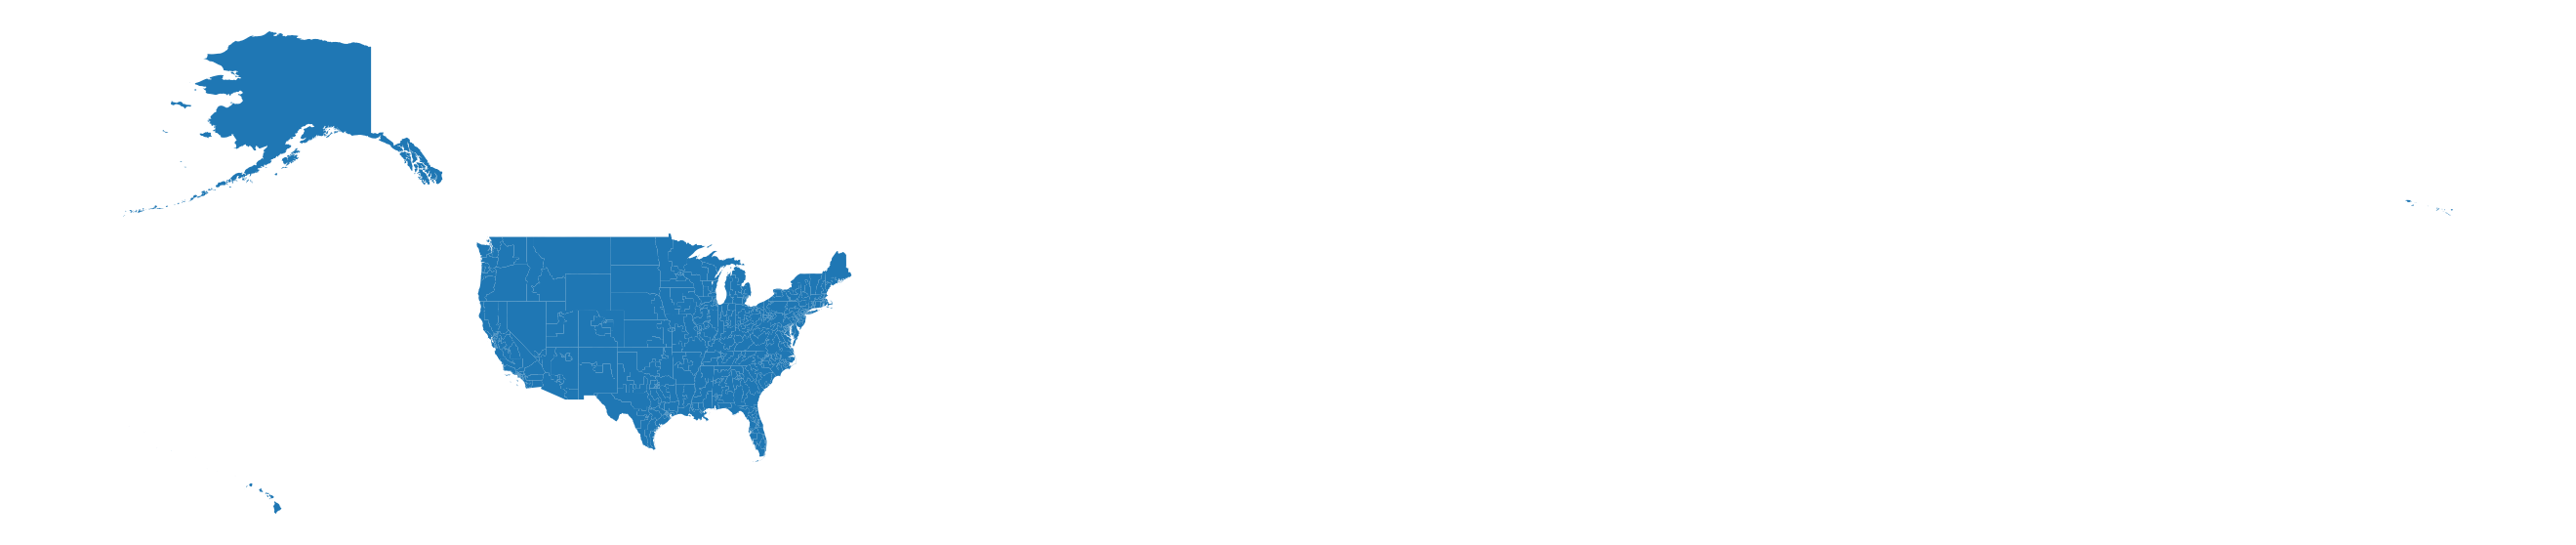

In [196]:
fig, ax = plt.subplots(figsize = (50, 10))
map_districts.plot(ax = ax)

ax.axis('off');

In [197]:
voting_turnout.to_csv("../data/voter_turnout.csv")
voting_age.to_csv("../data/voter_age.csv")
voting_ed.to_csv("../data/voter_edu.csv")
voting_sex_poverty.to_csv("../data/voter_sex_poverty.csv")
voting_race.to_csv("../data/voter_race.csv")

In [199]:
clean_districts.to_file("../data/cleaner_districts.geojson", driver="GeoJSON")

In [200]:
map_districts.to_file("../data/map_districts.geojson", driver="GeoJSON")

In [201]:
race_dem.to_file("../data/race_demographics_value.geojson", driver="GeoJSON")
age_dem.to_file("../data/age_demographics_value.geojson", driver="GeoJSON")
edu_dem.to_file("../data/edu_demographics_value.geojson", driver="GeoJSON")
sex_pov_dem.to_file("../data/sex_poverty_demographics.geojson", driver="GeoJSON")